<a href="https://colab.research.google.com/github/lynn-sketch/Cognitive_Computing_Exam_Folder/blob/main/Cognitive2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from google.colab import drive
drive.mount('/content/drive')

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Define the verified absolute path
DRIVE_DATA_PATH = '/content/drive/MyDrive/Cognitive_Computing_Exam/data'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import os
from collections import Counter

print("📌 Classes found:")
classes = os.listdir(DRIVE_DATA_PATH)
print(classes)

class_counts = {}

for cls in classes:
    cls_path = os.path.join(DRIVE_DATA_PATH, cls)
    if os.path.isdir(cls_path):
        class_counts[cls] = len(os.listdir(cls_path))

print("\n📊 Image Count per Class:")
for cls, count in class_counts.items():
    print(f"{cls}: {count} images")


📌 Classes found:
['Common_Rust', 'Healthy', 'Gray_Leaf_Spot', 'Blight']

📊 Image Count per Class:
Common_Rust: 1306 images
Healthy: 1162 images
Gray_Leaf_Spot: 574 images
Blight: 1146 images


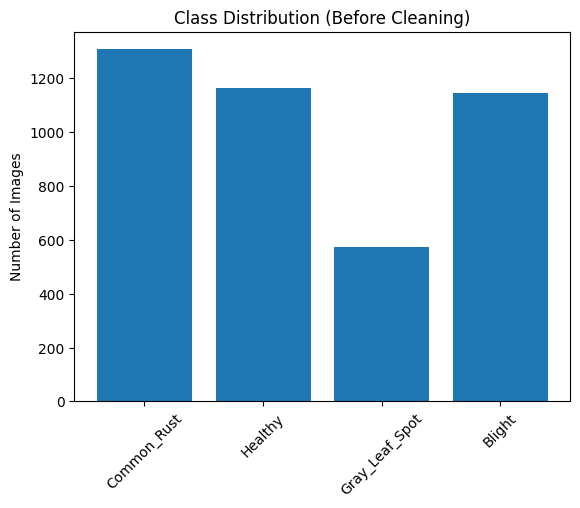

In [13]:
import matplotlib.pyplot as plt
plt.bar(class_counts.keys(), class_counts.values())
plt.title("Class Distribution (Before Cleaning)")
plt.xticks(rotation=45)
plt.ylabel("Number of Images")
plt.show()


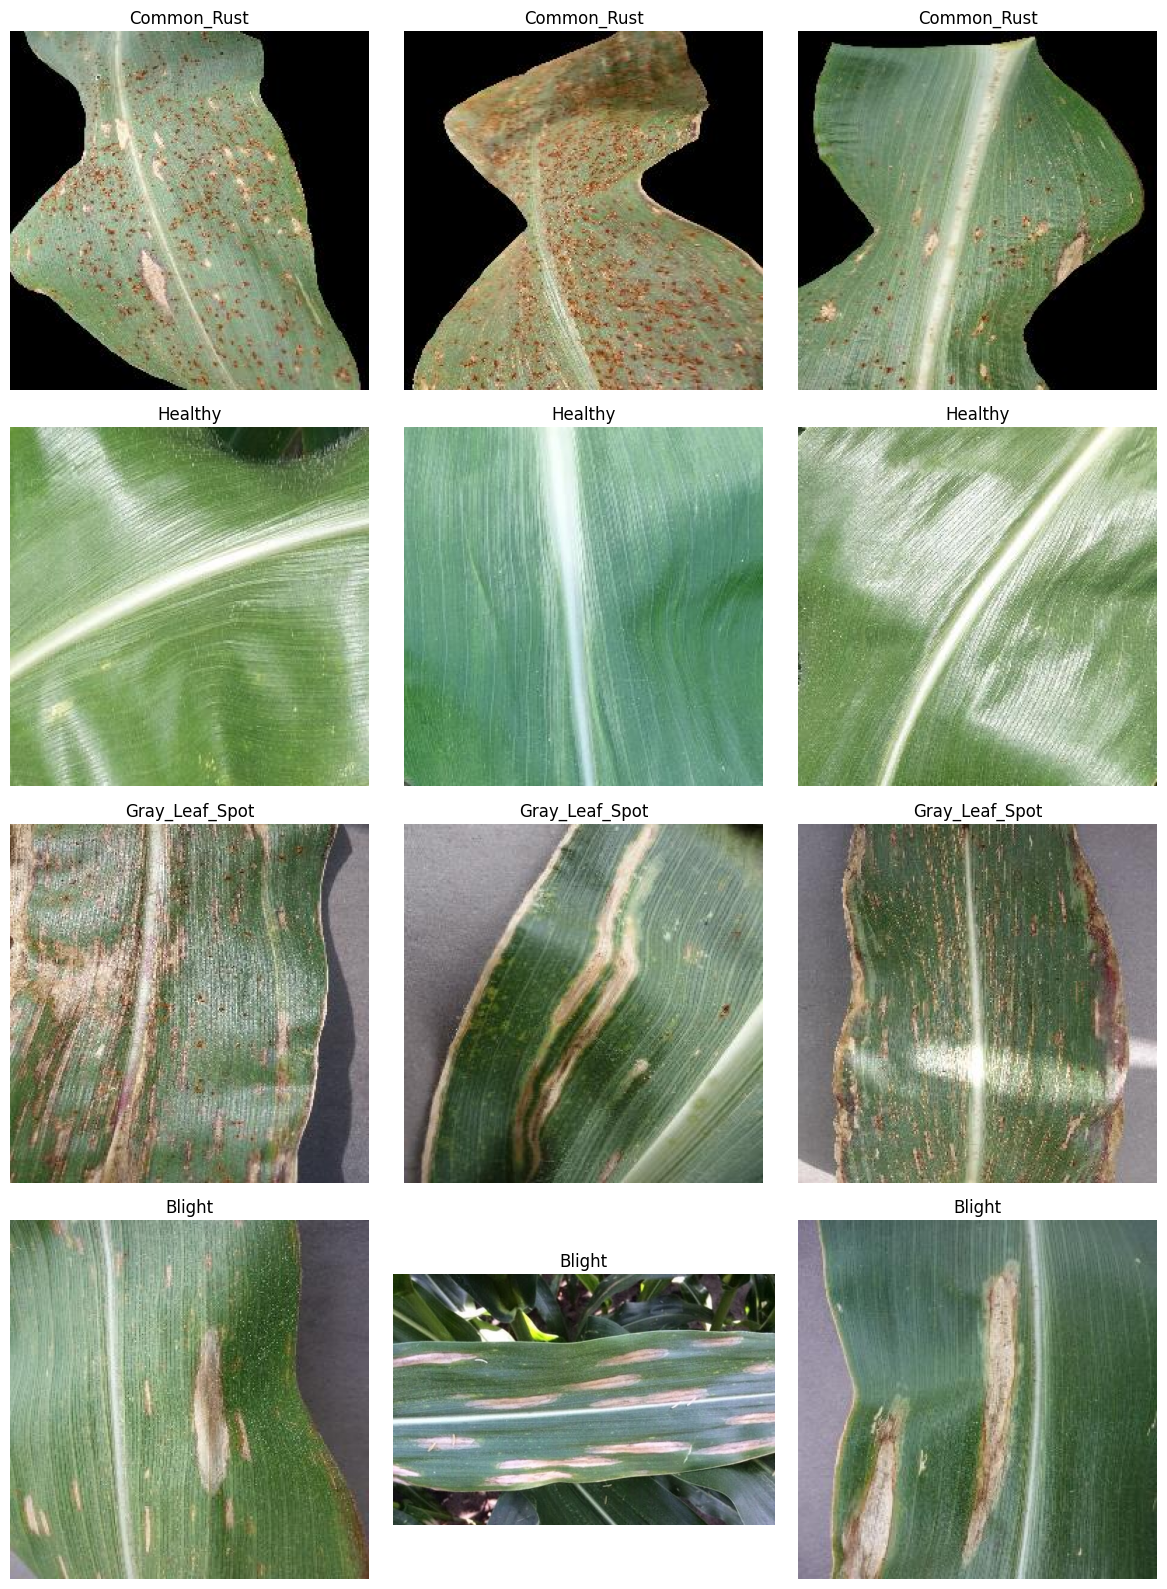

In [14]:
import matplotlib.pyplot as plt
from PIL import Image
import random

def show_samples_per_class(path, samples=3):
    classes = os.listdir(path)
    plt.figure(figsize=(samples*4, len(classes)*4))
    i = 1

    for cls in classes:
        cls_folder = os.path.join(path, cls)
        images = os.listdir(cls_folder)
        sample_images = random.sample(images, samples)

        for img in sample_images:
            img_path = os.path.join(cls_folder, img)
            image = Image.open(img_path)

            plt.subplot(len(classes), samples, i)
            plt.imshow(image)
            plt.title(cls)
            plt.axis("off")
            i += 1

    plt.tight_layout()
    plt.show()

show_samples_per_class(DRIVE_DATA_PATH)


In [15]:
import seaborn as sns


In [18]:
import os
from PIL import Image

DATA_PATH = "/content/drive/MyDrive/Cognitive_Computing_Exam/data"

widths = []
heights = []

for root, dirs, files in os.walk(DATA_PATH):
    for file in files:
        if file.lower().endswith((".jpg", ".jpeg", ".png")):
            img_path = os.path.join(root, file)
            try:
                img = Image.open(img_path)
                w, h = img.size
                widths.append(w)
                heights.append(h)
                img.close()
            except:
                print("❌ Could not read:", img_path)

print("Total images analyzed:", len(widths))


Total images analyzed: 4188


In [11]:
from PIL import Image

widths = []
heights = []

for cls in os.listdir(DRIVE_DATA_PATH):
    cls_path = os.path.join(DRIVE_DATA_PATH, cls)
    for file in os.listdir(cls_path):
        try:
            with Image.open(os.path.join(cls_path, file)) as img:
                w, h = img.size
                widths.append(w)
                heights.append(h)
        except:
            print("⚠️ Corrupt image detected:", file)

print("Average width:", sum(widths)/len(widths))
print("Average height:", sum(heights)/len(heights))


Average width: 307.5365329512894
Average height: 297.90616045845275


Checking for corrupted images

In [22]:
from PIL import Image
import os

DATA_PATH = "/content/drive/MyDrive/Cognitive_Computing_Exam/data"

corrupted_files = []

for root, dirs, files in os.walk(DATA_PATH):
    for file in files:
        if file.lower().endswith((".jpg", ".jpeg", ".png")):
            fpath = os.path.join(root, file)
            try:
                img = Image.open(fpath)
                img.verify()     # verifies file integrity
            except:
                print("❌ Corrupted:", fpath)
                corrupted_files.append(fpath)

print("\nTotal corrupted files:", len(corrupted_files))


❌ Corrupted: /content/drive/MyDrive/Cognitive_Computing_Exam/data/Common_Rust/Corn_Common_Rust (1295).jpg
❌ Corrupted: /content/drive/MyDrive/Cognitive_Computing_Exam/data/Common_Rust/Corn_Common_Rust (1275).jpg
❌ Corrupted: /content/drive/MyDrive/Cognitive_Computing_Exam/data/Common_Rust/Corn_Common_Rust (1289).jpg
❌ Corrupted: /content/drive/MyDrive/Cognitive_Computing_Exam/data/Gray_Leaf_Spot/Corn_Gray_Spot (1).jpg

Total corrupted files: 4


Deleting Corrupted images

In [23]:
corrupted_files = [
    "/content/drive/MyDrive/Cognitive_Computing_Exam/data/Common_Rust/Corn_Common_Rust (1295).jpg",
    "/content/drive/MyDrive/Cognitive_Computing_Exam/data/Common_Rust/Corn_Common_Rust (1275).jpg",
    "/content/drive/MyDrive/Cognitive_Computing_Exam/data/Common_Rust/Corn_Common_Rust (1289).jpg",
    "/content/drive/MyDrive/Cognitive_Computing_Exam/data/Gray_Leaf_Spot/Corn_Gray_Spot (1).jpg"
]

import os

for f in corrupted_files:
    if os.path.exists(f):
        os.remove(f)
        print("🗑️ Deleted:", f)
    else:
        print("⚠️ File already removed or not found:", f)


🗑️ Deleted: /content/drive/MyDrive/Cognitive_Computing_Exam/data/Common_Rust/Corn_Common_Rust (1295).jpg
🗑️ Deleted: /content/drive/MyDrive/Cognitive_Computing_Exam/data/Common_Rust/Corn_Common_Rust (1275).jpg
🗑️ Deleted: /content/drive/MyDrive/Cognitive_Computing_Exam/data/Common_Rust/Corn_Common_Rust (1289).jpg
🗑️ Deleted: /content/drive/MyDrive/Cognitive_Computing_Exam/data/Gray_Leaf_Spot/Corn_Gray_Spot (1).jpg


Resizing Images to 224 by 224

In [24]:
from PIL import Image
import os

DATA_PATH = "/content/drive/MyDrive/Cognitive_Computing_Exam/data"
TARGET_SIZE = (224, 224)

for root, dirs, files in os.walk(DATA_PATH):
    for file in files:
        if file.lower().endswith((".jpg", ".jpeg", ".png")):
            fpath = os.path.join(root, file)
            try:
                img = Image.open(fpath)
                img = img.resize(TARGET_SIZE)
                img.save(fpath)
            except:
                print("Resize failed:", fpath)


Count before oversampling

In [31]:
import os

DATA_PATH = "/content/drive/MyDrive/Cognitive_Computing_Exam/data"

for cls in os.listdir(DATA_PATH):
    cls_path = os.path.join(DATA_PATH, cls)
    if os.path.isdir(cls_path):
        count = len([f for f in os.listdir(cls_path) if f.lower().endswith((".jpg",".png",".jpeg"))])
        print(cls, "→", count)


Common_Rust → 1303
Healthy → 1162
Gray_Leaf_Spot → 573
Blight → 1146


In [32]:
import os
import shutil
import random

DATA_PATH = "/content/drive/MyDrive/Cognitive_Computing_Exam/data"
GLS_PATH = os.path.join(DATA_PATH, "Gray_Leaf_Spot")

TARGET_COUNT = 1200  # goal number of images

# List all original images
files = [f for f in os.listdir(GLS_PATH) if f.lower().endswith((".jpg", ".jpeg", ".png"))]
current_count = len(files)

print("Current Gray Leaf Spot images:", current_count)

# Oversample by copying existing images
while len(files) < TARGET_COUNT:
    chosen = random.choice(files)
    src = os.path.join(GLS_PATH, chosen)
    dst = os.path.join(GLS_PATH, f"oversample_{len(files)}.jpg")
    shutil.copy(src, dst)
    files.append(dst)

print("Oversampled Gray Leaf Spot images to:", len(files))


Current Gray Leaf Spot images: 573
Oversampled Gray Leaf Spot images to: 1200


Visualizing after Oversampling

/tmp/ipython-input-3725235795.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classes, y=counts, palette="viridis")


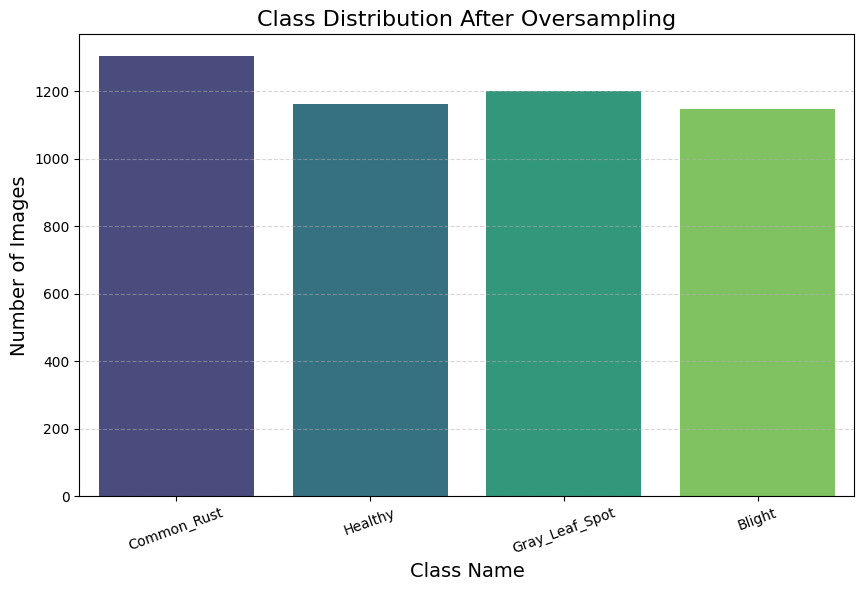

In [34]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

DATA_PATH = "/content/drive/MyDrive/Cognitive_Computing_Exam/data"

# Count images per class
class_counts = {}
for cls in os.listdir(DATA_PATH):
    cls_path = os.path.join(DATA_PATH, cls)
    if os.path.isdir(cls_path):
        count = len([
            f for f in os.listdir(cls_path)
            if f.lower().endswith((".jpg",".jpeg",".png"))
        ])
        class_counts[cls] = count

# Prepare data for sns
classes = list(class_counts.keys())
counts = list(class_counts.values())

# Visualization
plt.figure(figsize=(10,6))
sns.barplot(x=classes, y=counts, palette="viridis")

plt.title("Class Distribution After Oversampling", fontsize=16)
plt.xlabel("Class Name", fontsize=14)
plt.ylabel("Number of Images", fontsize=14)
plt.xticks(rotation=20)
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()


Count after oversampling

In [33]:
import os

DATA_PATH = "/content/drive/MyDrive/Cognitive_Computing_Exam/data"

for cls in os.listdir(DATA_PATH):
    cls_path = os.path.join(DATA_PATH, cls)
    if os.path.isdir(cls_path):
        count = len([f for f in os.listdir(cls_path) if f.lower().endswith((".jpg",".png",".jpeg"))])
        print(cls, "→", count)


Common_Rust → 1303
Healthy → 1162
Gray_Leaf_Spot → 1200
Blight → 1146


In [35]:
rescale=1./255


In [36]:
!pip install opencv-python-headless


Checking for blury images

In [37]:
import cv2
import os

DATA_PATH = "/content/drive/MyDrive/Cognitive_Computing_Exam/data"
blurry_images = []

def is_blurry(image_path, threshold=100.0):
    try:
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            return True  # corrupted or unreadable
        variance = cv2.Laplacian(img, cv2.CV_64F).var()
        return variance < threshold, variance
    except:
        return True, 0

for cls in os.listdir(DATA_PATH):
    cls_path = os.path.join(DATA_PATH, cls)
    if os.path.isdir(cls_path):
        for img_name in os.listdir(cls_path):
            if img_name.lower().endswith((".jpg", ".jpeg", ".png")):
                img_path = os.path.join(cls_path, img_name)
                blurry, score = is_blurry(img_path)
                if blurry:
                    blurry_images.append((img_path, score))

print(f"Total blurry images detected: {len(blurry_images)}")
for img, score in blurry_images[:20]:
    print(f"BLUR {score:.2f} → {img}")


Total blurry images detected: 287
BLUR 94.76 → /content/drive/MyDrive/Cognitive_Computing_Exam/data/Healthy/Corn_Health (497).jpg
BLUR 15.32 → /content/drive/MyDrive/Cognitive_Computing_Exam/data/Healthy/Corn_Health (433).jpg
BLUR 76.61 → /content/drive/MyDrive/Cognitive_Computing_Exam/data/Healthy/Corn_Health (510).jpg
BLUR 33.39 → /content/drive/MyDrive/Cognitive_Computing_Exam/data/Healthy/Corn_Health (583).jpg
BLUR 96.02 → /content/drive/MyDrive/Cognitive_Computing_Exam/data/Healthy/Corn_Health (325).jpg
BLUR 50.23 → /content/drive/MyDrive/Cognitive_Computing_Exam/data/Healthy/Corn_Health (590).jpg
BLUR 41.25 → /content/drive/MyDrive/Cognitive_Computing_Exam/data/Healthy/Corn_Health (1153).jpg
BLUR 27.70 → /content/drive/MyDrive/Cognitive_Computing_Exam/data/Healthy/Corn_Health (504).jpg
BLUR 32.48 → /content/drive/MyDrive/Cognitive_Computing_Exam/data/Healthy/Corn_Health (881).jpg
BLUR 16.70 → /content/drive/MyDrive/Cognitive_Computing_Exam/data/Healthy/Corn_Health (702).jpg
BLUR 

Deleting blury images > 70

In [38]:
threshold = 70  # delete images with score below this
to_delete = [ (img, score) for img, score in blurry_images if score < threshold ]

print("Images to delete:", len(to_delete))

for img_path, score in to_delete:
    os.remove(img_path)
    print(f"🗑️ Deleted (blur={score:.2f}): {img_path}")

print("\nDone deleting low-quality images.")


Images to delete: 209
🗑️ Deleted (blur=15.32): /content/drive/MyDrive/Cognitive_Computing_Exam/data/Healthy/Corn_Health (433).jpg
🗑️ Deleted (blur=33.39): /content/drive/MyDrive/Cognitive_Computing_Exam/data/Healthy/Corn_Health (583).jpg
🗑️ Deleted (blur=50.23): /content/drive/MyDrive/Cognitive_Computing_Exam/data/Healthy/Corn_Health (590).jpg
🗑️ Deleted (blur=41.25): /content/drive/MyDrive/Cognitive_Computing_Exam/data/Healthy/Corn_Health (1153).jpg
🗑️ Deleted (blur=27.70): /content/drive/MyDrive/Cognitive_Computing_Exam/data/Healthy/Corn_Health (504).jpg
🗑️ Deleted (blur=32.48): /content/drive/MyDrive/Cognitive_Computing_Exam/data/Healthy/Corn_Health (881).jpg
🗑️ Deleted (blur=16.70): /content/drive/MyDrive/Cognitive_Computing_Exam/data/Healthy/Corn_Health (702).jpg
🗑️ Deleted (blur=57.28): /content/drive/MyDrive/Cognitive_Computing_Exam/data/Healthy/Corn_Health (303).jpg
🗑️ Deleted (blur=62.09): /content/drive/MyDrive/Cognitive_Computing_Exam/data/Healthy/Corn_Health (72).jpg
🗑️ Del

Recounting dataset after deleting blury images

In [39]:
import os

DATA_PATH = "/content/drive/MyDrive/Cognitive_Computing_Exam/data"

for cls in os.listdir(DATA_PATH):
    cls_path = os.path.join(DATA_PATH, cls)
    if os.path.isdir(cls_path):
        count = len([
            f for f in os.listdir(cls_path)
            if f.lower().endswith((".jpg",".jpeg",".png"))
        ])
        print(cls, "→", count)


Common_Rust → 1303
Healthy → 953
Gray_Leaf_Spot → 1200
Blight → 1146


Oversampling healthy leaves

In [40]:
import os
import shutil
import random

DATA_PATH = "/content/drive/MyDrive/Cognitive_Computing_Exam/data"
HEALTHY_PATH = os.path.join(DATA_PATH, "Healthy")

TARGET_COUNT = 1200

files = [f for f in os.listdir(HEALTHY_PATH) if f.lower().endswith((".jpg",".jpeg",".png"))]
current_count = len(files)

print("Current Healthy images:", current_count)

while len(files) < TARGET_COUNT:
    chosen = random.choice(files)
    src = os.path.join(HEALTHY_PATH, chosen)
    dst = os.path.join(HEALTHY_PATH, f"healthy_copy_{len(files)}.jpg")
    shutil.copy(src, dst)
    files.append(dst)

print("Oversampled Healthy images to:", len(files))


Current Healthy images: 953
Oversampled Healthy images to: 1200


Aurgumentation

In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,

    # 🔥 Spatial augmentations (leaf orientation varies)
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.2,
    horizontal_flip=True,

    # 🔥 Lighting variations (simulates real field conditions)
    brightness_range=[0.7, 1.3],

    fill_mode='nearest',

    # Validation split
    validation_split=0.2
)


Creating a Test dataset

In [42]:
import os
import shutil
import random

# Paths
DATA_PATH = "/content/drive/MyDrive/Cognitive_Computing_Exam/data"
TEST_PATH = "/content/drive/MyDrive/Cognitive_Computing_Exam/data_test"

# Create base test directory
os.makedirs(TEST_PATH, exist_ok=True)

for cls in os.listdir(DATA_PATH):
    cls_folder = os.path.join(DATA_PATH, cls)
    if os.path.isdir(cls_folder):

        # Make class folder in test directory
        test_cls_folder = os.path.join(TEST_PATH, cls)
        os.makedirs(test_cls_folder, exist_ok=True)

        # List all images
        images = [f for f in os.listdir(cls_folder)
                  if f.lower().endswith((".jpg", ".jpeg", ".png"))]

        random.shuffle(images)

        # 10% split
        test_count = max(1, int(0.10 * len(images)))
        test_images = images[:test_count]

        # Move the test images
        for img in test_images:
            src = os.path.join(cls_folder, img)
            dst = os.path.join(test_cls_folder, img)
            shutil.move(src, dst)

        print(f"{cls}: Moved {test_count} images to test set.")


Common_Rust: Moved 130 images to test set.
Healthy: Moved 120 images to test set.
Gray_Leaf_Spot: Moved 120 images to test set.
Blight: Moved 114 images to test set.


In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths
TRAIN_PATH = "/content/drive/MyDrive/Cognitive_Computing_Exam/data"
TEST_PATH = "/content/drive/MyDrive/Cognitive_Computing_Exam/data_test"

# ============================
# 1️⃣ TRAINING + VALIDATION GENERATOR
# ============================

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    brightness_range=[0.7, 1.3],
    fill_mode='nearest',
    validation_split=0.2  # 20% validation
)

# Training generator
train_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=42
)

# Validation generator
validation_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=True,
    seed=42
)

print("\nTraining and Validation Generators Ready ✔️")

# ============================
# 2️⃣ TEST GENERATOR (NO AUGMENTATION)
# ============================

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    TEST_PATH,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False   # important for predictions
)

print("\nTest Generator Ready ✔️")


Found 3493 images belonging to 4 classes.
Found 872 images belonging to 4 classes.

Training and Validation Generators Ready ✔️
Found 484 images belonging to 4 classes.

Test Generator Ready ✔️


Understanding Pillar

MobileNetv2 Architecture

In [44]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

IMG_SIZE = (224, 224)
NUM_CLASSES = 4

# Load MobileNetV2 base
base_model = MobileNetV2(
    input_shape=(*IMG_SIZE, 3),
    include_top=False,
    weights="imagenet"
)

base_model.trainable = False  # freeze pretrained layers

# Build classifier
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(NUM_CLASSES, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0008),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,468 (9.24 MB)

 Trainable params: 164,484 (642.52 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Creating Call backs

In [46]:
checkpoint_path = "/content/drive/MyDrive/Cognitive_Computing_Exam/best_model.keras"

callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    ),

    ModelCheckpoint(
        filepath=checkpoint_path,
        monitor='val_loss',
        save_best_only=True
    ),

    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.3,
        patience=3,
        min_lr=1e-6
    )
]


Training model

In [47]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=25,
    callbacks=callbacks
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 351s 3s/step - accuracy: 0.6671 - loss: 0.7963 - val_accuracy: 0.8532 - val_loss: 0.3505 - learning_rate: 8.0000e-04
Epoch 2/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 292s 3s/step - accuracy: 0.8254 - loss: 0.4187 - val_accuracy: 0.8911 - val_loss: 0.2589 - learning_rate: 8.0000e-04
Epoch 3/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 305s 3s/step - accuracy: 0.8599 - loss: 0.3423 - val_accuracy: 0.8922 - val_loss: 0.2546 - learning_rate: 8.0000e-04
Epoch 4/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 297s 3s/step - accuracy: 0.8559 - loss: 0.3270 - val_accuracy: 0.9071 - val_loss: 0.2303 - learning_rate: 8.0000e-04
Epoch 5/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 287s 3s/step - accuracy: 0.8690 - loss: 0.3087 - val_accuracy: 0.8899 - val_loss: 0.2715 - learning_rate: 8.0000e-04
Epoch 6/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 321s 3s/step - accuracy: 0.8815 - loss: 0.2663 - val_accuracy: 0.9048 - val_loss: 0.2455 - learning_rate: 8.0000e-04
Epoch 7/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 294s 3s/step - acc

In [49]:
save_path = "/content/drive/MyDrive/Cognitive_Computing_Exam/model1.keras"
model.save(save_path)

print("Model saved successfully as:", save_path)


Model saved successfully as: /content/drive/MyDrive/Cognitive_Computing_Exam/model1.keras


Evaluate Model Accuracy

In [50]:
# Evaluate on the test dataset
test_loss, test_acc = model.evaluate(test_generator)
print(f"\n📌 Test Accuracy: {test_acc*100:.2f}%")
print(f"📌 Test Loss: {test_loss:.4f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.8666 - loss: 0.2783

📌 Test Accuracy: 90.29%
📌 Test Loss: 0.2043


Generate Predictions for the Entire Test Set

In [51]:
import numpy as np

# Predict probabilities
y_pred_probs = model.predict(test_generator)
# Convert probabilities → class indices
y_pred = np.argmax(y_pred_probs, axis=1)

# True labels
y_true = test_generator.classes

# Class names
class_labels = list(test_generator.class_indices.keys())
print("Class Labels:", class_labels)


16/16 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step
Class Labels: ['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']


Classification Report (Precision, Recall, F1-score)

In [52]:
from sklearn.metrics import classification_report

print("\n📌 Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))



📌 Classification Report:

                precision    recall  f1-score   support

        Blight       0.86      0.79      0.82       114
   Common_Rust       0.95      0.98      0.96       130
Gray_Leaf_Spot       0.80      0.86      0.83       120
       Healthy       1.00      0.97      0.99       120

      accuracy                           0.90       484
     macro avg       0.90      0.90      0.90       484
  weighted avg       0.90      0.90      0.90       484



Confusion Matrix + Heatmap Visualization

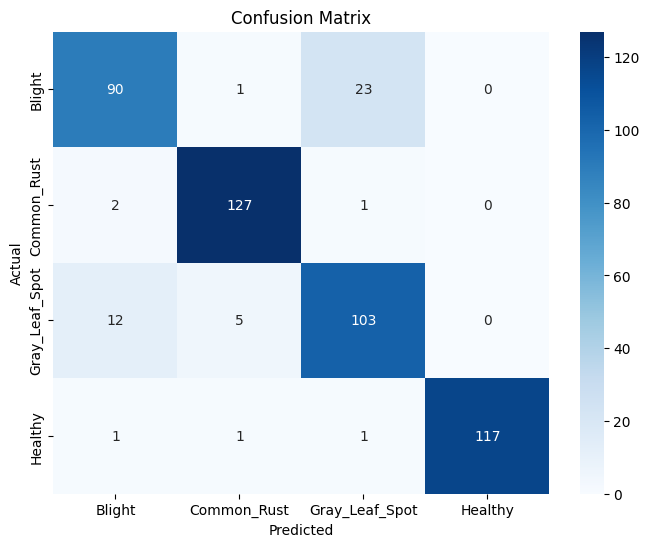

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels,
            yticklabels=class_labels)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Per-Class Accuracy (Optional but useful)

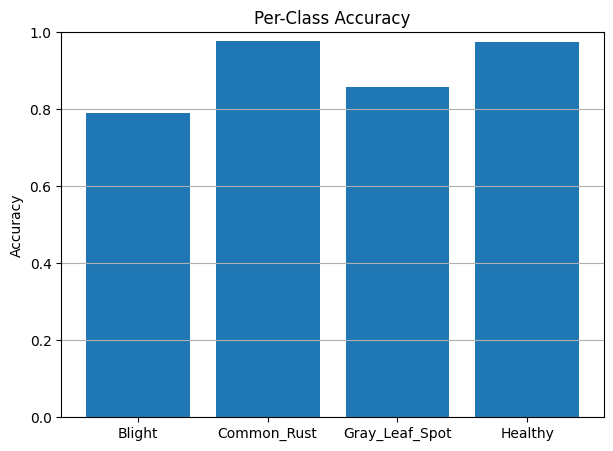

In [54]:
class_accuracy = []

for i in range(len(class_labels)):
    idxs = np.where(y_true == i)[0]
    correct = np.sum(y_pred[idxs] == i)
    acc = correct / len(idxs)
    class_accuracy.append(acc)

plt.figure(figsize=(7,5))
plt.bar(class_labels, class_accuracy)
plt.ylabel("Accuracy")
plt.title("Per-Class Accuracy")
plt.ylim(0,1)
plt.grid(axis="y")
plt.show()


Fine Tuning the Model

In [55]:
model = tf.keras.models.load_model("/content/drive/MyDrive/Cognitive_Computing_Exam/model1.keras")
print("Model loaded!")


Model loaded!


In [58]:
base_model = model.layers[0]   # MobileNetV2 inside Sequential

for layer in base_model.layers[-20:]:
    layer.trainable = True

print("Unfroze last 20 layers.")


Unfroze last 20 layers.


In [59]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

history_finetune = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=5,
    callbacks=[early_stop]
)


Epoch 1/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 341s 3s/step - accuracy: 0.7384 - loss: 0.6332 - val_accuracy: 0.9025 - val_loss: 0.2386
Epoch 2/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 331s 3s/step - accuracy: 0.8517 - loss: 0.3671 - val_accuracy: 0.9025 - val_loss: 0.2416
Epoch 3/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 335s 3s/step - accuracy: 0.8584 - loss: 0.3261 - val_accuracy: 0.9014 - val_loss: 0.2312
Epoch 4/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 326s 3s/step - accuracy: 0.8618 - loss: 0.3239 - val_accuracy: 0.9071 - val_loss: 0.2341
Epoch 5/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 340s 3s/step - accuracy: 0.8845 - loss: 0.2839 - val_accuracy: 0.9071 - val_loss: 0.2584


Saving the fne tuned model

In [60]:
model.save("/content/drive/MyDrive/Cognitive_Computing_Exam/model_finetuned.keras")
print("Fine-tuned model saved!")


Fine-tuned model saved!


In [61]:
model = tf.keras.models.load_model("/content/drive/MyDrive/Cognitive_Computing_Exam/model_finetuned.keras")
print("Fine-tuned model loaded!")


Fine-tuned model loaded!


In [62]:
import numpy as np

# Predict class probabilities
y_pred_probs = model.predict(test_generator)

# Convert to predicted class indices
y_pred = np.argmax(y_pred_probs, axis=1)

# True labels
y_true = test_generator.classes

# Class labels
class_labels = list(test_generator.class_indices.keys())
print("Class labels:", class_labels)


16/16 ━━━━━━━━━━━━━━━━━━━━ 48s 3s/step
Class labels: ['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']


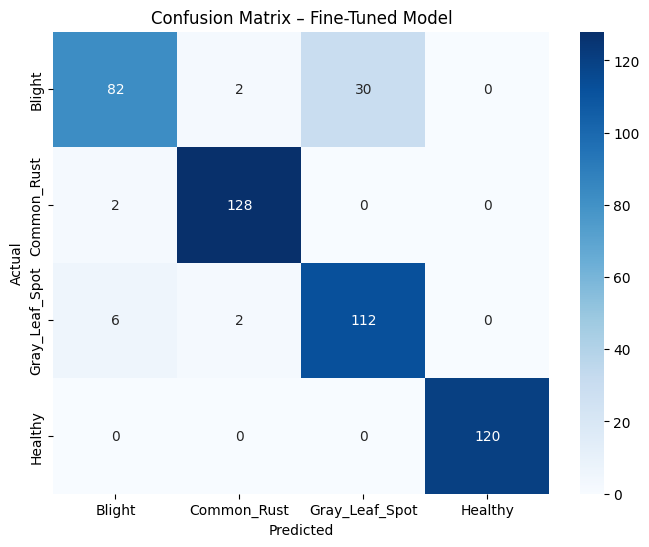

In [63]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Fine-Tuned Model")
plt.show()


In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, target_names=class_labels))


                precision    recall  f1-score   support

        Blight       0.91      0.72      0.80       114
   Common_Rust       0.97      0.98      0.98       130
Gray_Leaf_Spot       0.79      0.93      0.85       120
       Healthy       1.00      1.00      1.00       120

      accuracy                           0.91       484
     macro avg       0.92      0.91      0.91       484
  weighted avg       0.92      0.91      0.91       484



Reasoning Engine

In [70]:
class AgriculturalKnowledgeBase:
    def __init__(self):
        self.kb = {
            "diseases": {},
            "symptoms": {},
            "treatments": {},
            "preventions": {},
            "environmental_factors": {},
            "risk_assessment": {},
            "recommendations": {}
        }
        self._build_knowledge_base()

    def _build_knowledge_base(self):
        self._add_diseases()
        self._add_symptoms()
        self._add_treatments()
        self._add_preventions()
        self._add_environmental_factors()
        self._add_risk_assessment()
        self._add_recommendations()

    # ------------------------------------------------------------
    # DISEASE PROFILES
    # ------------------------------------------------------------
    def _add_diseases(self):
        self.kb["diseases"] = {
            "Blight": {
                "common_name": "Northern Corn Leaf Blight",
                "scientific_name": "Exserohilum turcicum",
                "type": "Fungal",
                "severity": "High",
                "risk_level": "High Risk",
                "color": "#c23b22",
                "icon": "🔥",
                "description": (
                    "Northern Corn Leaf Blight is a fungal disease causing long, elliptical, gray-green lesions "
                    "that turn tan or brown with age. Lesions can grow up to 15 cm long and may coalesce, "
                    "killing large areas of leaves. Severe infections can reduce yield by 30-50%."
                ),
                "incubation_period": "7-14 days",
                "spread_method": "Wind-blown spores, infected crop residue",
                "affected_parts": ["Leaves", "Sheaths", "Husks"],
                "identification_tips": [
                    "Lesions are cigar-shaped (elongated ellipses)",
                    "Gray-green initially, turning tan with dark borders",
                    "Parallel to leaf veins",
                    "More common in humid, temperate regions"
                ]
            },

            "Common_Rust": {
                "common_name": "Common Rust of Maize",
                "scientific_name": "Puccinia sorghi",
                "type": "Fungal",
                "severity": "Medium",
                "risk_level": "Medium Risk",
                "color": "#daa520",
                "icon": "🟠",
                "description": (
                    "Common rust appears as small, circular to elongate cinnamon-brown pustules "
                    "on both leaf surfaces. Pustules rupture to release reddish-brown spores. "
                    "Severe infections cause premature leaf senescence and reduce photosynthesis. "
                    "Yield losses typically range from 10-30%."
                ),
                "incubation_period": "5-10 days",
                "spread_method": "Wind-dispersed urediniospores",
                "affected_parts": ["Leaves", "Stalks", "Husks"],
                "identification_tips": [
                    "Small circular to oval pustules",
                    "Cinnamon-brown to brick-red color",
                    "Pustules appear on both leaf surfaces",
                    "Common during cool to moderate temperatures"
                ]
            },

            "Gray_Leaf_Spot": {
                "common_name": "Gray Leaf Spot",
                "scientific_name": "Cercospora zeae-maydis",
                "type": "Fungal",
                "severity": "High",
                "risk_level": "High Risk",
                "color": "#6a8a7c",
                "icon": "⚫",
                "description": (
                    "Gray Leaf Spot produces rectangular to elongated gray lesions bounded by leaf veins. "
                    "Lesions have a gray, necrotic center with a yellow or chlorotic halo. "
                    "Under severe pressure, lesions coalesce causing complete leaf blight. "
                    "Yield losses can exceed 50% in susceptible hybrids under favorable conditions."
                ),
                "incubation_period": "14-21 days",
                "spread_method": "Rain-splashed spores, infected residue",
                "affected_parts": ["Leaves", "Sheaths"],
                "identification_tips": [
                    "Rectangular lesions parallel to veins",
                    "Gray to tan necrotic centers",
                    "Yellow halo around lesions",
                    "Lesions may coalesce into large blighted areas"
                ]
            },

            "Healthy": {
                "common_name": "Healthy Maize",
                "scientific_name": "Zea mays",
                "type": "Normal",
                "severity": "None",
                "risk_level": "Healthy",
                "color": "#3c9d6b",
                "icon": "✅",
                "description": (
                    "The maize plant shows no visible symptoms of disease. Leaves are vibrant green, "
                    "turgid, and free from lesions, spots, or discoloration. Plant exhibits optimal "
                    "growth and development characteristics for its growth stage."
                ),
                "monitoring_advice": [
                    "Continue regular scouting",
                    "Maintain proper fertilization",
                    "Ensure adequate irrigation",
                    "Watch for early disease signs"
                ],
                "optimal_conditions": [
                    "Well-drained soil",
                    "Adequate sunlight",
                    "Proper plant spacing",
                    "Balanced nutrient supply"
                ]
            },

            "Uncertain": {
                "common_name": "Uncertain Diagnosis",
                "type": "Unknown",
                "severity": "Unknown",
                "risk_level": "Uncertain",
                "color": "#666666",
                "icon": "❓",
                "description": (
                    "The image is unclear or does not provide sufficient detail for reliable diagnosis. "
                    "This could be due to poor lighting, blurry focus, partial leaf images, "
                    "or early-stage symptoms that are not yet distinctive."
                ),
                "recommended_actions": [
                    "Retake photo with better lighting",
                    "Ensure leaf fills most of the frame",
                    "Focus on clear lesion areas",
                    "Take multiple photos from different angles"
                ],
                "common_causes": [
                    "Poor image quality",
                    "Early infection stage",
                    "Mixed symptoms",
                    "Non-typical presentation"
                ]
            },

            "Not_Maize": {
                "common_name": "Not a Maize Leaf",
                "type": "Non-Target",
                "severity": "None",
                "risk_level": "Not a maize leaf",
                "color": "#444444",
                "icon": "🚫",
                "description": (
                    "The uploaded image does not appear to be a maize leaf. "
                    "The system is specifically trained to diagnose maize leaf diseases and "
                    "requires clear images of maize leaves for accurate analysis."
                ),
                "identification_tips": [
                    "Maize leaves have parallel venation",
                    "Typical width: 5-10 cm",
                    "Length: 30-100 cm",
                    "Distinctive midrib"
                ],
                "correct_upload_guidelines": [
                    "Capture entire leaf or clear section",
                    "Use plain background if possible",
                    "Good natural lighting",
                    "Avoid shadows and obstructions"
                ]
            }
        }

    # ------------------------------------------------------------
    # SYMPTOMS (Detailed)
    # ------------------------------------------------------------
    def _add_symptoms(self):
        self.kb["symptoms"] = {
            "Blight": [
                {"symptom": "Cigar-shaped lesions", "stage": "Early", "confidence": "High"},
                {"symptom": "Gray-green elliptical spots", "stage": "Early", "confidence": "High"},
                {"symptom": "Tan centers with dark margins", "stage": "Advanced", "confidence": "High"},
                {"symptom": "Lesions parallel to veins", "stage": "All", "confidence": "High"},
                {"symptom": "Lesion coalescence", "stage": "Severe", "confidence": "Medium"},
                {"symptom": "Premature leaf death", "stage": "Late", "confidence": "Medium"},
                {"symptom": "Reduced photosynthetic area", "stage": "Advanced", "confidence": "Medium"},
                {"symptom": "Yield reduction symptoms", "stage": "Late", "confidence": "Low"}
            ],

            "Common_Rust": [
                {"symptom": "Small circular pustules", "stage": "Early", "confidence": "High"},
                {"symptom": "Cinnamon-brown spore masses", "stage": "Active", "confidence": "High"},
                {"symptom": "Pustules on both leaf surfaces", "stage": "Active", "confidence": "High"},
                {"symptom": "Chlorotic halos around pustules", "stage": "Early", "confidence": "Medium"},
                {"symptom": "Pustule rupture releasing spores", "stage": "Advanced", "confidence": "High"},
                {"symptom": "Leaf yellowing and drying", "stage": "Late", "confidence": "Medium"},
                {"symptom": "Reduced plant vigor", "stage": "Advanced", "confidence": "Medium"},
                {"symptom": "Premature senescence", "stage": "Late", "confidence": "Low"}
            ],

            "Gray_Leaf_Spot": [
                {"symptom": "Rectangular gray lesions", "stage": "Early", "confidence": "High"},
                {"symptom": "Necrotic centers with yellow halos", "stage": "Active", "confidence": "High"},
                {"symptom": "Lesions bounded by leaf veins", "stage": "All", "confidence": "High"},
                {"symptom": "Lesion coalescence into blight", "stage": "Severe", "confidence": "High"},
                {"symptom": "Gray to tan necrotic tissue", "stage": "Advanced", "confidence": "High"},
                {"symptom": "Severe defoliation", "stage": "Late", "confidence": "Medium"},
                {"symptom": "Reduced kernel fill", "stage": "Late", "confidence": "Low"},
                {"symptom": "Stalk lodging susceptibility", "stage": "Late", "confidence": "Low"}
            ],

            "Healthy": [
                {"symptom": "Uniform green coloration", "stage": "All", "confidence": "High"},
                {"symptom": "Turgid leaves", "stage": "All", "confidence": "High"},
                {"symptom": "No lesions or spots", "stage": "All", "confidence": "High"},
                {"symptom": "Normal plant stature", "stage": "All", "confidence": "Medium"},
                {"symptom": "Proper leaf orientation", "stage": "All", "confidence": "Medium"}
            ],

            "Uncertain": [
                {"symptom": "Unclear image details", "stage": "N/A", "confidence": "High"},
                {"symptom": "Blurry or out-of-focus", "stage": "N/A", "confidence": "High"},
                {"symptom": "Poor lighting conditions", "stage": "N/A", "confidence": "Medium"},
                {"symptom": "Ambiguous symptoms", "stage": "N/A", "confidence": "Medium"},
                {"symptom": "Early-stage infection", "stage": "N/A", "confidence": "Low"}
            ],

            "Not_Maize": [
                {"symptom": "Wrong leaf shape", "stage": "N/A", "confidence": "High"},
                {"symptom": "Different venation pattern", "stage": "N/A", "confidence": "High"},
                {"symptom": "Incorrect leaf texture", "stage": "N/A", "confidence": "Medium"},
                {"symptom": "Non-maize plant characteristics", "stage": "N/A", "confidence": "Medium"},
                {"symptom": "Background objects dominant", "stage": "N/A", "confidence": "Low"}
            ]
        }

    # ------------------------------------------------------------
    # TREATMENTS (Detailed with application guidelines)
    # ------------------------------------------------------------
    def _add_treatments(self):
        self.kb["treatments"] = {
            "Blight": [
                {
                    "treatment": "Triazole fungicides (e.g., Tebuconazole)",
                    "active_ingredient": "Tebuconazole",
                    "mode_of_action": "Demethylation inhibitor",
                    "application_rate": "200-250 ml/ha",
                    "timing": "At first symptom appearance or preventively",
                    "frequency": "1-2 applications, 14-day interval",
                    "effectiveness": "High (80-90% control)",
                    "cost": "Medium",
                    "safety": "REI: 24 hours, PHI: 30 days"
                },
                {
                    "treatment": "Strobilurin fungicides (e.g., Azoxystrobin)",
                    "active_ingredient": "Azoxystrobin",
                    "mode_of_action": "QoI inhibitor",
                    "application_rate": "250-300 ml/ha",
                    "timing": "Early vegetative stage",
                    "frequency": "Single application",
                    "effectiveness": "High (85-95% control)",
                    "cost": "High",
                    "safety": "REI: 12 hours, PHI: 14 days"
                },
                {
                    "treatment": "Cultural practices",
                    "components": ["Crop rotation", "Residue management", "Resistant varieties"],
                    "timing": "Pre-planting and season-long",
                    "effectiveness": "Medium to High",
                    "cost": "Low",
                    "notes": "Combine with chemical control for best results"
                }
            ],

            "Common_Rust": [
                {
                    "treatment": "Triazole + Strobilurin mix (e.g., Tebuconazole + Trifloxystrobin)",
                    "active_ingredient": "Tebuconazole + Trifloxystrobin",
                    "mode_of_action": "DMI + QoI",
                    "application_rate": "300-350 ml/ha",
                    "timing": "When 5-10% leaf area affected",
                    "frequency": "1 application",
                    "effectiveness": "Very High (90-95% control)",
                    "cost": "High",
                    "safety": "REI: 24 hours, PHI: 21 days"
                },
                {
                    "treatment": "Resistant hybrid planting",
                    "resistance_genes": ["Rp1 gene complex"],
                    "timing": "Pre-planting selection",
                    "effectiveness": "High (genotype dependent)",
                    "cost": "Medium (seed cost)",
                    "notes": "Choose hybrids with multiple resistance genes"
                },
                {
                    "treatment": "Foliar sulfur application",
                    "application_rate": "2-3 kg/ha",
                    "timing": "Early infection stage",
                    "frequency": "2 applications, 10-day interval",
                    "effectiveness": "Medium (60-70% control)",
                    "cost": "Low",
                    "safety": "REI: 12 hours"
                }
            ],

            "Gray_Leaf_Spot": [
                {
                    "treatment": "Azoxystrobin-based fungicides",
                    "active_ingredient": "Azoxystrobin",
                    "mode_of_action": "QoI inhibitor",
                    "application_rate": "250-300 ml/ha",
                    "timing": "VT-R1 stage (tasseling to silking)",
                    "frequency": "1-2 applications",
                    "effectiveness": "High (85-90% control)",
                    "cost": "High",
                    "safety": "REI: 12 hours, PHI: 14 days"
                },
                {
                    "treatment": "Crop rotation with non-hosts",
                    "rotation_crops": ["Soybean", "Legumes", "Small grains"],
                    "duration": "At least 2-year rotation",
                    "effectiveness": "Medium (reduces inoculum)",
                    "cost": "Low",
                    "notes": "Most effective when combined with tillage"
                },
                {
                    "treatment": "Tillage practices",
                    "methods": ["Deep plowing", "Residue incorporation"],
                    "timing": "Post-harvest",
                    "effectiveness": "Medium to High",
                    "cost": "Medium",
                    "notes": "Breaks disease cycle by burying infected residue"
                }
            ],

            "Healthy": [
                {
                    "treatment": "Preventive monitoring",
                    "components": ["Regular scouting", "Weather monitoring", "Trap cropping"],
                    "frequency": "Weekly during growing season",
                    "effectiveness": "High for early detection",
                    "cost": "Low",
                    "notes": "Early detection prevents significant losses"
                },
                {
                    "treatment": "Balanced fertilization",
                    "nutrients": ["Nitrogen", "Potassium", "Zinc"],
                    "application": "Based on soil test results",
                    "effectiveness": "Improves plant immunity",
                    "cost": "Medium",
                    "notes": "Avoid excess nitrogen which increases susceptibility"
                }
            ],

            "Uncertain": [
                {
                    "treatment": "Image quality improvement",
                    "steps": ["Better lighting", "Steady focus", "Close-up view"],
                    "effectiveness": "High for accurate diagnosis",
                    "cost": "None",
                    "notes": "Clear images enable accurate AI diagnosis"
                },
                {
                    "treatment": "Expert consultation",
                    "options": ["Agricultural extension officer", "Plant pathologist"],
                    "effectiveness": "High",
                    "cost": "Variable",
                    "notes": "Human expert can assess subtle symptoms"
                }
            ],

            "Not_Maize": [
                {
                    "treatment": "Correct image capture",
                    "guidelines": ["Focus on maize leaf", "Plain background", "Good lighting"],
                    "effectiveness": "High",
                    "cost": "None",
                    "notes": "System only analyzes maize leaves"
                },
                {
                    "treatment": "Plant identification",
                    "resources": ["Plant identification apps", "Field guides"],
                    "effectiveness": "High for species ID",
                    "cost": "Low to None",
                    "notes": "Identify plant before disease diagnosis"
                }
            ]
        }

    # ------------------------------------------------------------
    # PREVENTION METHODS
    # ------------------------------------------------------------
    def _add_preventions(self):
        self.kb["preventions"] = {
            "Blight": [
                {"method": "Plant resistant hybrids", "efficacy": "High", "cost": "Medium"},
                {"method": "Crop rotation (2+ years)", "efficacy": "Medium", "cost": "Low"},
                {"method": "Deep tillage of residue", "efficacy": "High", "cost": "Medium"},
                {"method": "Avoid excessive nitrogen", "efficacy": "Medium", "cost": "Low"},
                {"method": "Optimal plant spacing", "efficacy": "Medium", "cost": "Low"},
                {"method": "Early planting", "efficacy": "Low", "cost": "None"},
                {"method": "Field sanitation", "efficacy": "Medium", "cost": "Low"},
                {"method": "Use disease-free seeds", "efficacy": "High", "cost": "Medium"}
            ],

            "Common_Rust": [
                {"method": "Early-maturing varieties", "efficacy": "Medium", "cost": "Low"},
                {"method": "Avoid late planting", "efficacy": "Medium", "cost": "None"},
                {"method": "Fungicide seed treatment", "efficacy": "High", "cost": "Low"},
                {"method": "Destroy volunteer maize", "efficacy": "Medium", "cost": "Low"},
                {"method": "Reduce plant density", "efficacy": "Low", "cost": "None"},
                {"method": "Balanced fertilization", "efficacy": "Medium", "cost": "Medium"},
                {"method": "Windbreaks in endemic areas", "efficacy": "Low", "cost": "High"}
            ],

            "Gray_Leaf_Spot": [
                {"method": "Resistant/tolerant hybrids", "efficacy": "High", "cost": "Medium"},
                {"method": "No-till with rotation", "efficacy": "Medium", "cost": "Low"},
                {"method": "Avoid continuous maize", "efficacy": "High", "cost": "Medium"},
                {"method": "Proper irrigation timing", "efficacy": "Medium", "cost": "Low"},
                {"method": "Canopy management", "efficacy": "Medium", "cost": "Low"},
                {"method": "Early harvest planning", "efficacy": "Low", "cost": "None"},
                {"method": "Field edge monitoring", "efficacy": "High", "cost": "Low"}
            ],

            "Healthy": [
                {"method": "Regular field inspection", "efficacy": "High", "cost": "Low"},
                {"method": "Soil health management", "efficacy": "High", "cost": "Medium"},
                {"method": "Integrated Pest Management", "efficacy": "High", "cost": "Medium"},
                {"method": "Weather-based alerts", "efficacy": "Medium", "cost": "Low"},
                {"method": "Record keeping", "efficacy": "High", "cost": "Low"}
            ],

            "Uncertain": [
                {"method": "Regular camera maintenance", "efficacy": "High", "cost": "Low"},
                {"method": "Training on image capture", "efficacy": "High", "cost": "Low"},
                {"method": "Use of tripod/stand", "efficacy": "Medium", "cost": "Low"},
                {"method": "Multiple angle photography", "efficacy": "High", "cost": "None"}
            ],

            "Not_Maize": [
                {"method": "Plant identification training", "efficacy": "High", "cost": "Low"},
                {"method": "Clear labeling in field", "efficacy": "Medium", "cost": "Low"},
                {"method": "Use of field guides", "efficacy": "High", "cost": "Low"},
                {"method": "Digital plant databases", "efficacy": "High", "cost": "None"}
            ]
        }

    # ------------------------------------------------------------
    # ENVIRONMENTAL FACTORS
    # ------------------------------------------------------------
    def _add_environmental_factors(self):
        self.kb["environmental_factors"] = {
            "Blight": {
                "optimal_temperature": "20-27°C",
                "optimal_humidity": ">90% RH",
                "leaf_wetness": ">12 hours",
                "rainfall": "Frequent light rains",
                "soil_conditions": ["High moisture", "Poor drainage"],
                "seasonal_pattern": "Late vegetative to reproductive stages",
                "geographic_distribution": "Worldwide, more severe in humid regions",
                "risk_increase_factors": [
                    "Continuous maize cropping",
                    "High plant density",
                    "Overhead irrigation",
                    "Susceptible hybrids",
                    "Windy conditions during spore release"
                ],
                "monitoring_indicators": [
                    "Dew periods >10 hours",
                    "Temperature 20-27°C range",
                    "Relative humidity >85%",
                    "Previous year infection history"
                ]
            },

            "Common_Rust": {
                "optimal_temperature": "15-25°C",
                "optimal_humidity": "75-85% RH",
                "leaf_wetness": "6-8 hours",
                "rainfall": "Moderate, not heavy",
                "soil_conditions": ["Not soil-borne", "Spores airborne"],
                "seasonal_pattern": "Cooler periods of growing season",
                "geographic_distribution": "Temperate and subtropical regions",
                "risk_increase_factors": [
                    "Cool nights with dew",
                    "Overcast conditions",
                    "Late-planted maize",
                    "Dense canopies",
                    "Adjacent infected fields"
                ],
                "monitoring_indicators": [
                    "Night temperatures 15-20°C",
                    "Morning dew present",
                    "Overcast weather patterns",
                    "Spore trap counts increasing"
                ]
            },

            "Gray_Leaf_Spot": {
                "optimal_temperature": "25-30°C",
                "optimal_humidity": ">95% RH",
                "leaf_wetness": ">18 hours",
                "rainfall": "Heavy dews or frequent rains",
                "soil_conditions": ["High residue cover", "Conservation tillage"],
                "seasonal_pattern": "Warm, humid periods",
                "geographic_distribution": "Humid maize-growing regions",
                "risk_increase_factors": [
                    "No-till with maize residue",
                    "High humidity microclimates",
                    "Irrigation with overhead systems",
                    "Susceptible hybrids in continuous maize",
                    "Field topography creating fog/dew"
                ],
                "monitoring_indicators": [
                    "Temperature 25-30°C sustained",
                    "Leaf wetness duration >12h",
                    "Relative humidity >90%",
                    "Previous season severity"
                ]
            },

            "Healthy": {
                "optimal_temperature": "25-30°C daytime, 15-20°C nighttime",
                "optimal_humidity": "60-80% RH",
                "soil_conditions": ["Well-drained", "pH 5.8-7.0", "Good organic matter"],
                "rainfall": "Evenly distributed 500-800 mm/season",
                "sunlight": "Full sun, 6-8 hours daily",
                "wind": "Moderate for pollination",
                "optimal_conditions": [
                    "Soil temperature >10°C for germination",
                    "Adequate soil moisture at planting",
                    "Timely weed control",
                    "Balanced nutrient availability",
                    "Proper planting depth (3-5 cm)"
                ]
            },

            "Uncertain": {
                "environmental_factors": [
                    "Poor lighting conditions during photography",
                    "Extreme weather affecting leaf appearance",
                    "Mixed environmental stress symptoms",
                    "Transition periods between seasons"
                ],
                "recommendations": [
                    "Capture images during mid-day",
                    "Avoid rainy or overcast days for photography",
                    "Use flash or artificial light if needed",
                    "Wait for stable weather conditions"
                ]
            },

            "Not_Maize": {
                "environmental_considerations": [
                    "Different plants have different optimal conditions",
                    "Maize-specific environmental requirements don't apply",
                    "Need to identify correct plant species first"
                ],
                "recommendations": [
                    "Verify plant species in field",
                    "Check planting records",
                    "Use plant identification tools",
                    "Consult local agricultural experts"
                ]
            }
        }

    # ------------------------------------------------------------
    # RISK ASSESSMENT
    # ------------------------------------------------------------
    def _add_risk_assessment(self):
        self.kb["risk_assessment"] = {
            "Blight": {
                "economic_threshold": "10% leaf area affected at silking",
                "action_threshold": "5% leaf area affected",
                "scouting_frequency": "Weekly from V8 stage",
                "risk_categories": {
                    "low": ["Resistant hybrid", "Dry conditions", "Early planting"],
                    "medium": ["Moderate hybrid", "Average humidity", "Normal planting"],
                    "high": ["Susceptible hybrid", "High humidity", "Late planting", "History of blight"]
                },
                "yield_loss_model": {
                    "low": "0-10%",
                    "medium": "10-30%",
                    "high": "30-50%",
                    "severe": "50-70%"
                },
                "decision_support": {
                    "no_action": "Risk low, continue monitoring",
                    "cultural_only": "Medium risk, implement cultural controls",
                    "fungicide_considered": "High risk, consider fungicide at VT",
                    "fungicide_recommended": "Very high risk, apply fungicide immediately"
                }
            },

            "Common_Rust": {
                "economic_threshold": "5-10% leaf area affected pre-tasseling",
                "action_threshold": "1-2% leaf area affected",
                "scouting_frequency": "Twice weekly during cool periods",
                "risk_categories": {
                    "low": ["Resistant hybrid", "Hot dry weather", "Early maturing"],
                    "medium": ["Moderate hybrid", "Cool nights with dew", "Normal maturity"],
                    "high": ["Susceptible hybrid", "Cool humid weather", "Late planting"]
                },
                "yield_loss_model": {
                    "low": "0-5%",
                    "medium": "5-15%",
                    "high": "15-30%",
                    "severe": "30-40%"
                }
            },

            "Gray_Leaf_Spot": {
                "economic_threshold": "5% leaf area affected at tasseling",
                "action_threshold": "1-2 lesions per plant",
                "scouting_frequency": "Weekly from V10 to R3",
                "risk_categories": {
                    "low": ["Resistant hybrid", "Dry conditions", "Rotation with soybean"],
                    "medium": ["Moderate hybrid", "Some humidity", "Reduced tillage"],
                    "high": ["Susceptible hybrid", "High humidity", "Continuous maize", "No-till"]
                },
                "yield_loss_model": {
                    "low": "0-10%",
                    "medium": "10-25%",
                    "high": "25-40%",
                    "severe": "40-60%"
                }
            }
        }

    # ------------------------------------------------------------
    # RECOMMENDATIONS (Integrated Management)
    # ------------------------------------------------------------
    def _add_recommendations(self):
        self.kb["recommendations"] = {
            "Blight": {
                "short_term": [
                    "Apply fungicide if at action threshold",
                    "Increase scouting frequency",
                    "Record disease progression",
                    "Adjust irrigation to reduce leaf wetness"
                ],
                "medium_term": [
                    "Plan crop rotation for next season",
                    "Select resistant hybrids for next planting",
                    "Budget for fungicide applications",
                    "Improve field drainage if needed"
                ],
                "long_term": [
                    "Develop resistant hybrid planting strategy",
                    "Implement integrated disease management plan",
                    "Establish field history database",
                    "Participate in regional monitoring networks"
                ],
                "emergency": [
                    "Harvest early if severe infection near maturity",
                    "Consider crop insurance claims",
                    "Document losses for future reference",
                    "Consult extension service immediately"
                ]
            },

            "Common_Rust": {
                "short_term": [
                    "Apply protectant fungicide if conditions favor disease",
                    "Monitor weather forecasts closely",
                    "Assess hybrid susceptibility",
                    "Consider early harvest if severe"
                ],
                "medium_term": [
                    "Evaluate hybrid performance for next season",
                    "Consider planting date adjustments",
                    "Plan fungicide program for next year",
                    "Improve field sanitation"
                ],
                "long_term": [
                    "Incorporate rust resistance in breeding program",
                    "Develop regional spore monitoring system",
                    "Participate in resistant variety trials",
                    "Establish early warning system"
                ]
            },

            "Gray_Leaf_Spot": {
                "short_term": [
                    "Apply fungicide at VT-R1 if risk high",
                    "Reduce irrigation frequency if possible",
                    "Increase plant spacing if severe",
                    "Monitor lower leaves regularly"
                ],
                "medium_term": [
                    "Implement 2-year crop rotation",
                    "Consider tillage options for residue management",
                    "Select GLS-tolerant hybrids",
                    "Improve field air circulation"
                ],
                "long_term": [
                    "Adopt integrated residue management",
                    "Participate in resistance breeding programs",
                    "Establish long-term rotation plans",
                    "Implement precision agriculture techniques"
                ]
            },

            "Healthy": {
                "maintenance": [
                    "Continue regular monitoring program",
                    "Maintain optimal fertilization",
                    "Implement preventive IPM",
                    "Keep detailed field records"
                ],
                "improvement": [
                    "Conduct soil testing annually",
                    "Experiment with new resistant hybrids",
                    "Improve irrigation efficiency",
                    "Participate in yield contests"
                ]
            }
        }

    # ------------------------------------------------------------
    # UTILITY METHODS
    # ------------------------------------------------------------
    def get_disease_info(self, disease_name):
        """Get complete information for a specific disease"""
        if disease_name in self.kb["diseases"]:
            return self.kb["diseases"][disease_name]
        return None

    def get_symptoms(self, disease_name):
        """Get symptoms for a specific disease"""
        return self.kb["symptoms"].get(disease_name, [])

    def get_treatments(self, disease_name):
        """Get treatments for a specific disease"""
        return self.kb["treatments"].get(disease_name, [])

    def get_preventions(self, disease_name):
        """Get prevention methods for a specific disease"""
        return self.kb["preventions"].get(disease_name, [])

    def get_environmental_factors(self, disease_name):
        """Get environmental factors for a specific disease"""
        return self.kb["environmental_factors"].get(disease_name, {})

    def get_risk_assessment(self, disease_name):
        """Get risk assessment for a specific disease"""
        return self.kb["risk_assessment"].get(disease_name, {})

    def get_recommendations(self, disease_name, timeframe="short_term"):
        """Get recommendations for a specific disease and timeframe"""
        disease_recs = self.kb["recommendations"].get(disease_name, {})
        return disease_recs.get(timeframe, [])

    def get_response(self, user_question, disease_name, language="english"):
        """Generate AI response based on user question and detected disease"""
        # Simplified response logic - you can expand this
        question_lower = user_question.lower()

        if "symptom" in question_lower:
            symptoms = self.get_symptoms(disease_name)
            return f"Symptoms of {disease_name}: " + "; ".join([s["symptom"] for s in symptoms])

        elif "treat" in question_lower or "cure" in question_lower:
            treatments = self.get_treatments(disease_name)
            return f"Treatments for {disease_name}: " + "; ".join([t["treatment"] for t in treatments])

        elif "prevent" in question_lower:
            preventions = self.get_preventions(disease_name)
            return f"Prevention for {disease_name}: " + "; ".join([p["method"] for p in preventions])

        elif "environment" in question_lower or "weather" in question_lower:
            env_factors = self.get_environmental_factors(disease_name)
            if isinstance(env_factors, dict):
                factors = []
                for key, value in env_factors.items():
                    if key not in ["risk_increase_factors", "monitoring_indicators"]:
                        factors.append(f"{key}: {value}")
                return f"Environmental factors for {disease_name}: " + "; ".join(factors)
            return f"Environmental information for {disease_name}"

        elif "risk" in question_lower:
            risk_info = self.get_risk_assessment(disease_name)
            return f"Risk assessment for {disease_name}: Economic threshold at {risk_info.get('economic_threshold', 'N/A')}"

        else:
            # Default: return disease description
            disease_info = self.get_disease_info(disease_name)
            if disease_info:
                return disease_info.get("description", "No description available.")
            return f"Information about {disease_name}"

    def list_all_diseases(self):
        """List all diseases in the knowledge base"""
        return list(self.kb["diseases"].keys())

    def export_knowledge_base(self, format="json"):
        """Export the knowledge base in different formats"""
        import json
        if format == "json":
            return json.dumps(self.kb, indent=2)
        return self.kb


# ------------------------------------------------------------
# CREATE AND EXPORT THE KNOWLEDGE BASE
# ------------------------------------------------------------
if __name__ == "__main__":
    # Create the knowledge base
    kb_instance = AgriculturalKnowledgeBase()
    kb = kb_instance.kb

    print("✅ Knowledge Base Created Successfully!")
    print(f"📊 Contains {len(kb['diseases'])} diseases")
    print(f"📊 Contains {sum(len(v) for v in kb['symptoms'].values())} symptoms")
    print(f"📊 Contains {sum(len(v) for v in kb['treatments'].values())} treatments")
    print(f"📊 Contains {sum(len(v) for v in kb['preventions'].values())} prevention methods")

    # Quick test
    print("\n🔍 Testing knowledge base retrieval:")
    print(f"Blight description: {kb_instance.get_disease_info('Blight')['description'][:100]}...")
    print(f"Common Rust symptoms: {len(kb_instance.get_symptoms('Common_Rust'))}")
    print(f"Gray Leaf Spot treatments: {len(kb_instance.get_treatments('Gray_Leaf_Spot'))}")

    # Test response generation
    print("\n🤖 Testing response generation:")
    print(kb_instance.get_response("What are the symptoms?", "Blight"))

✅ Knowledge Base Created Successfully!
📊 Contains 6 diseases
📊 Contains 39 symptoms
📊 Contains 15 treatments
📊 Contains 35 prevention methods

🔍 Testing knowledge base retrieval:
Blight description: Northern Corn Leaf Blight is a fungal disease causing long, elliptical, gray-green lesions that turn...
Common Rust symptoms: 8
Gray Leaf Spot treatments: 3

🤖 Testing response generation:
Symptoms of Blight: Cigar-shaped lesions; Gray-green elliptical spots; Tan centers with dark margins; Lesions parallel to veins; Lesion coalescence; Premature leaf death; Reduced photosynthetic area; Yield reduction symptoms


In [71]:
# Create the knowledge base instance
kb_instance = AgriculturalKnowledgeBase()
kb = kb_instance.kb

print("✅ Knowledge Base Created Successfully!")
print(f"📊 Contains {len(kb['diseases'])} diseases")

✅ Knowledge Base Created Successfully!
📊 Contains 6 diseases


In [72]:
# Build and visualize static graph
static_graph = StaticKnowledgeGraph(kb)  # Pass kb, not kb_instance
static_graph.build_graph()
static_graph.visualize()

TypeError: unhashable type: 'dict'

Static Knowledge Graph

In [67]:
import networkx as nx
import matplotlib.pyplot as plt

class StaticKnowledgeGraph:
    def __init__(self, kb):
        self.kb = kb
        self.graph = nx.DiGraph()

    def build_graph(self):

        # ----------------------------
        # 1. DISEASE NODES
        # ----------------------------
        for disease in self.kb["diseases"]:
            self.graph.add_node(disease, type="disease")

        # ----------------------------
        # 2. SYMPTOMS
        # ----------------------------
        for disease, symptoms in self.kb["symptoms"].items():
            for symptom in symptoms:
                self.graph.add_node(symptom, type="symptom")
                self.graph.add_edge(symptom, disease, relation="indicates")

        # ----------------------------
        # 3. CAUSES
        # ----------------------------
        for disease, info in self.kb["diseases"].items():
            if "causal_agent" in info:
                cause = info["causal_agent"]
                self.graph.add_node(cause, type="cause")
                self.graph.add_edge(cause, disease, relation="causes")

        # ----------------------------
        # 4. TREATMENTS
        # ----------------------------
        for disease, treatments in self.kb["treatments"].items():
            for t in treatments:
                treat_name = t["treatment"]
                self.graph.add_node(treat_name, type="treatment")
                self.graph.add_edge(treat_name, disease, relation="treats")

        # ----------------------------
        # 5. PREVENTIONS
        # ----------------------------
        for disease, preventions in self.kb["preventions"].items():
            for p in preventions:
                self.graph.add_node(p, type="prevention")
                self.graph.add_edge(p, disease, relation="prevents")

        # ----------------------------
        # 6. ENVIRONMENTAL FACTORS
        # ----------------------------
        for disease, env in self.kb["environmental_factors"].items():
            if "high_risk_conditions" in env:
                for cond in env["high_risk_conditions"]:
                    self.graph.add_node(cond, type="environment")
                    self.graph.add_edge(cond, disease, relation="increases_risk_of")

        # ----------------------------
        # 7. EXTRA COMPLEX RELATIONS
        # ----------------------------

        # Co-occurring diseases
        self.graph.add_edge("Common_Rust", "Gray_Leaf_Spot", relation="co-occurs_with")
        self.graph.add_edge("Gray_Leaf_Spot", "Blight", relation="co-occurs_with")
        self.graph.add_edge("Blight", "Common_Rust", relation="co-occurs_with")

        print("Static graph built successfully with advanced relations.")

    def visualize(self):
        plt.figure(figsize=(22, 18))

        pos = nx.spring_layout(self.graph, k=0.6, seed=42)

        # ---- NODE COLORS ----
        colors_map = {
            "disease": "red",
            "symptom": "orange",
            "treatment": "green",
            "prevention": "skyblue",
            "cause": "purple",
            "environment": "brown"
        }

        node_colors = [
            colors_map[self.graph.nodes[node]["type"]]
            for node in self.graph.nodes
        ]

        # ---- DRAW GRAPH ----
        nx.draw(
            self.graph,
            pos,
            with_labels=True,
            node_color=node_colors,
            node_size=2500,
            font_size=8,
            edge_color="gray",
            arrows=True
        )

        # ---- EDGE LABELS ----
        edge_labels = {
            (u, v): d["relation"] for u, v, d in self.graph.edges(data=True)
        }
        nx.draw_networkx_edge_labels(
            self.graph, pos, edge_labels=edge_labels, font_size=7
        )

        plt.title("Static Knowledge Graph (Complete Relationship Network)", fontsize=16)
        plt.show()


AttributeError: 'dict' object has no attribute 'kb'

Dynamic Knowledge Graph

In [82]:
!pip install pyvis


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 33.4 MB/s eta 0:00:00


In [96]:
from pyvis.network import Network

def animate_dynamic_graph(graph, output_file="dynamic_graph.html"):
    """
    Visualize a dynamic network graph with PyVis (animated floating nodes).
    """
    net = Network(height="800px", width="100%", directed=True,
                  notebook=True, cdn_resources="in_line")

    # Enable physics animation
    net.barnes_hut()   # forces nodes to float and settle dynamically

    # Add nodes
    for node, data in graph.nodes(data=True):
        node_type = data.get("type", "unknown")

        colors = {
            "disease": "red",
            "symptom": "orange",
            "treatment": "green",
            "prevention": "skyblue",
            "cause": "purple",
            "environment": "brown"
        }

        net.add_node(node,
                     label=node,
                     color=colors.get(node_type, "gray"))

    # Add edges
    for u, v, data in graph.edges(data=True):
        relation = data.get("relation", "")
        confidence = data.get("confidence", 0.5)

        net.add_edge(u, v,
                     title=f"{relation} (confidence: {confidence:.2f})",
                     value=confidence)

    # Generate HTML file
    net.show(output_file)
    print(f"✅ Animated knowledge graph saved to: {output_file}")


In [97]:
animate_dynamic_graph(dyn_graph.graph, "animated_kb_graph.html")


animated_kb_graph.html
✅ Animated knowledge graph saved to: animated_kb_graph.html


In [98]:
from google.colab import files
files.download("animated_kb_graph.html")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
# Uninstall older versions
!pip uninstall torch torchaudio -y

# Install compatible versions (stable)
!pip install torch==2.2.0 torchaudio==2.2.0 --index-url https://download.pytorch.org/whl/cu118


Found existing installation: torch 2.2.0+cu118
Uninstalling torch-2.2.0+cu118:
  Successfully uninstalled torch-2.2.0+cu118
Found existing installation: torchaudio 2.2.0+cu118
Uninstalling torchaudio-2.2.0+cu118:
  Successfully uninstalled torchaudio-2.2.0+cu118
Looking in indexes: https://download.pytorch.org/whl/cu118
  Using cached https://download.pytorch.org/whl/cu118/torch-2.2.0%2Bcu118-cp312-cp312-linux_x86_64.whl (811.6 MB)
  Using cached https://download.pytorch.org/whl/cu118/torchaudio-2.2.0%2Bcu118-cp312-cp312-linux_x86_64.whl (3.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.24.0+cu126 requires torch==2.9.0, but you have torch 2.2.0+cu118 which is incompatible.


In [2]:
!pip install speechbrain


In [3]:
import torchaudio
from speechbrain.pretrained import Tacotron2, HIFIGAN



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.12/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.12/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.12/dist-package

In [4]:

import torchaudio
from speechbrain.pretrained import Tacotron2, HIFIGAN

# --- Load Sunbird Luganda TTS and Vocoder ---
tacotron2 = Tacotron2.from_hparams(
    source="Sunbird/sunbird-lug-tts",
    savedir="tmp_sunbird_lug_tts"
)

hifi_gan = HIFIGAN.from_hparams(
    source="speechbrain/tts-hifigan-ljspeech",
    savedir="tmp_vocoder"
)

# --- Function to convert text to speech ---
def text_to_speech_luganda(text, filename="output_luganda.wav"):
    # Generate mel spectrogram
    mel_output, mel_length, alignment = tacotron2.encode_text(text)

    # Convert mel spectrogram to waveform
    waveforms = hifi_gan.decode_batch(mel_output)

    # Save waveform as WAV file
    torchaudio.save(filename, waveforms.squeeze(1), 22050)

    print(f"✅ Audio saved as {filename}")

INFO:speechbrain.utils.fetching:Fetch hyperparams.yaml: Using symlink found at '/content/tmp_sunbird_lug_tts/hyperparams.yaml'
INFO:speechbrain.utils.fetching:Fetch custom.py: Fetching from HuggingFace Hub 'Sunbird/sunbird-lug-tts' if not cached
DEBUG:speechbrain.utils.parameter_transfer:Collecting files (or symlinks) for pretraining in tmp_sunbird_lug_tts.
INFO:speechbrain.utils.fetching:Fetch model.ckpt: Using symlink found at '/content/tmp_sunbird_lug_tts/model.ckpt'
DEBUG:speechbrain.utils.parameter_transfer:Set local path in self.paths["model"] = /content/tmp_sunbird_lug_tts/model.ckpt
INFO:speechbrain.utils.parameter_transfer:Loading pretrained files for: model
DEBUG:speechbrain.utils.parameter_transfer:Redirecting (loading from local path): model -> /content/tmp_sunbird_lug_tts/model.ckpt
INFO:speechbrain.utils.fetching:Fetch hyperparams.yaml: Using symlink found at '/content/tmp_vocoder/hyperparams.yaml'
INFO:speechbrain.utils.fetching:Fetch custom.py: Fetching from HuggingFace

In [5]:
# Example response text
response = "Okusaliirwa kwa Blight: Remove infected plants, Copper-based fungicides, Biological controls"

# Call TTS
text_to_speech_luganda(response)


✅ Audio saved as output_luganda.wav


In [56]:
# ============================
# 1. Install Dependencies
# ============================
!pip install speechbrain torchaudio --quiet

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import torchaudio

from speechbrain.pretrained import Tacotron2, HIFIGAN
from IPython.display import display, Audio, FileLink
from ipywidgets import FileUpload, Text, Dropdown, Button, Output

# IMPORTANT: Correct preprocessing import (MOBILE NET)
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input


# ============================
# 2. Load TTS Models (Sunbird)
# ============================
tacotron2 = Tacotron2.from_hparams(
    source="Sunbird/sunbird-lug-tts",
    savedir="tmp_sunbird_lug_tts"
)

hifi_gan = HIFIGAN.from_hparams(
    source="speechbrain/tts-hifigan-ljspeech",
    savedir="tmp_vocoder"
)

# ============================
# 3. TTS for Luganda
# ============================
def text_to_speech_luganda(text, filename="luganda_tts_output.wav"):
    mel_output, mel_length, alignment = tacotron2.encode_text(text)
    waveform = hifi_gan.decode_batch(mel_output)
    torchaudio.save(filename, waveform.squeeze(1), 22050)
    print("🔊 Luganda audio generated:")
    display(Audio(filename))
    return FileLink(filename)


# ============================
# 4. Agricultural Knowledge Base
# ============================
class AgriculturalKnowledgeBase:
    def __init__(self):
        self.kb = {
            "diseases": {
                "Blight": {
                    "description": "Fungal disease causing leaf spots and drying.",
                    "severity": "High",
                    "yield_loss": "30-50%"
                },
                "Common_Rust": {
                    "description": "Fungal disease with orange-brown pustules on leaves.",
                    "severity": "Moderate to High",
                    "yield_loss": "15-40%"
                },
                "Gray_Leaf_Spot": {
                    "description": "Gray rectangular spots reducing photosynthesis.",
                    "severity": "High",
                    "yield_loss": "20-50%"
                },
                "Healthy": {
                    "description": "No disease detected. Crop is healthy!"
                }
            },

            "symptoms": {
                "Blight": ["leaf lesions", "brown spots", "wilting"],
                "Common_Rust": ["orange pustules", "powdery spores"],
                "Gray_Leaf_Spot": ["gray rectangular spots", "leaf blight"],
                "Healthy": []
            },

            "treatments": {
                "Blight": [{"treatment": "Use copper-based fungicides"}],
                "Common_Rust": [{"treatment": "Apply rust-resistant varieties"}],
                "Gray_Leaf_Spot": [{"treatment": "Fungicide application & crop rotation"}],
                "Healthy": []
            },

            "preventions": {
                "Blight": ["crop rotation", "proper spacing"],
                "Common_Rust": ["remove infected leaves", "grow resistant hybrids"],
                "Gray_Leaf_Spot": ["avoid overhead irrigation", "use disease-free seeds"],
                "Healthy": []
            },

            "environmental_factors": {
                "Blight": {"high_risk_conditions": ["humid weather", "wet leaves"]},
                "Common_Rust": {"high_risk_conditions": ["warm & moist conditions"]},
                "Gray_Leaf_Spot": {"high_risk_conditions": ["high humidity", "monocropping"]},
                "Healthy": {}
            }
        }
kb_instance = AgriculturalKnowledgeBase()
kb = kb_instance.kb


# ============================
# 5. Load Your Fine-Tuned Model
# ============================
model_path = "/content/drive/MyDrive/Cognitive_Computing_Exam/model_finetuned.keras"
model = tf.keras.models.load_model(model_path)

print("🔥 Fine-tuned model loaded successfully!")
class_names = ["Blight", "Common_Rust", "Gray_Leaf_Spot", "Healthy"]


# ============================
# 6. FIXED PREDICTION FUNCTION
# ============================
def predict_disease(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0

    preds = model.predict(img_array, verbose=0)[0]

    # Sort predictions
    sorted_preds = np.sort(preds)[::-1]
    top1 = sorted_preds[0] * 100
    top2 = sorted_preds[1] * 100

    idx = np.argmax(preds)
    disease = class_names[idx]
    confidence = top1

    # Detect non-leaf or unclear image
    low_confidence = (confidence < 55) or ((top1 - top2) < 10)

    return disease, confidence, low_confidence


# ============================
# 7. NLP Response
# ============================
def agro_nlp_response(user_text, predicted_disease=None, lang="english", uncertain=False):

    # -------------------------
    # 1. HANDLE UNCERTAIN IMAGES FIRST
    # -------------------------
    if uncertain:
        if lang == "luganda":
            return "Sikyisobola kumanya bulungi. Ekifaananyi tekirabika ng'eky'ebbimera bya kasooli."
        else:
            return "I cannot confidently detect the disease. The image may not be a maize leaf."

    # -------------------------
    # 2. NORMAL DISEASE RESPONSE
    # -------------------------
    disease_key = predicted_disease
    info = kb.kb["diseases"][disease_key]
    symptoms = kb.kb["symptoms"][disease_key]
    treatments = [t["treatment"] for t in kb.kb["treatments"][disease_key]]
    preventions = kb.kb["preventions"][disease_key]
    env = kb.kb["environmental_factors"][disease_key]

    text = user_text.lower()

    # Ask about disease
    if any(w in text for w in ["disease", "ekirwadde", "problem"]):
        return f"{disease_key}: {info['description']} Severity: {info.get('severity','N/A')}."

    # Ask about symptoms
    if any(w in text for w in ["symptom", "okulaga", "ebimala"]):
        return f"Symptoms of {disease_key}: {', '.join(symptoms)}"

    # Ask about treatment
    if any(w in text for w in ["treatment", "obujjanjabi"]):
        return f"Treatments for {disease_key}: {', '.join(treatments)}"

    # Ask about prevention
    if any(w in text for w in ["prevention", "okwewala", "okukendeeza"]):
        return f"Prevention measures for {disease_key}: {', '.join(preventions)}"

    # Ask about environment
    if any(w in text for w in ["environment", "obudde"]):
        return f"Risk factors: {env.get('high_risk_conditions','None')}"

    # Default fallback
    return f"{disease_key}: {info['description']}"


# ============================
# 8. USER INTERFACE
# ============================
upload = FileUpload(accept='image/*', multiple=False)
question = Text(description="Your question:")
language = Dropdown(options=['english', 'luganda'], description="Language:")
submit_btn = Button(description="Submit")
output = Output()

def on_submit(b):
    with output:
        output.clear_output()

        if not upload.value:
            print("⚠️ Please upload an image first.")
            return

        for name, filedata in upload.value.items():
            img_path = f"/tmp/{name}"
            with open(img_path, "wb") as f:
                f.write(filedata["content"])

            # Prediction
            disease, conf = predict_disease(img_path)
            print(f"🔍 Predicted Disease: {disease} ({conf:.2f}%)")

            # NLP Response
            response = agro_nlp_response(
                question.value,
                predicted_disease=disease,
                lang=language.value
            )
            print(f"💬 Response: {response}")

            # Luganda audio
            if language.value == "luganda":
                print("🔊 Generating Luganda audio...")
                display(text_to_speech_luganda(response))

submit_btn.on_click(on_submit)
upload.value.clear()
upload._counter = 0  # Reset the label e.g., Upload (0)


display(upload, question, language, submit_btn, output)


INFO:speechbrain.utils.fetching:Fetch hyperparams.yaml: Using symlink found at '/content/tmp_sunbird_lug_tts/hyperparams.yaml'
INFO:speechbrain.utils.fetching:Fetch custom.py: Fetching from HuggingFace Hub 'Sunbird/sunbird-lug-tts' if not cached
DEBUG:speechbrain.utils.parameter_transfer:Collecting files (or symlinks) for pretraining in tmp_sunbird_lug_tts.
INFO:speechbrain.utils.fetching:Fetch model.ckpt: Using symlink found at '/content/tmp_sunbird_lug_tts/model.ckpt'
DEBUG:speechbrain.utils.parameter_transfer:Set local path in self.paths["model"] = /content/tmp_sunbird_lug_tts/model.ckpt
INFO:speechbrain.utils.parameter_transfer:Loading pretrained files for: model
DEBUG:speechbrain.utils.parameter_transfer:Redirecting (loading from local path): model -> /content/tmp_sunbird_lug_tts/model.ckpt
INFO:speechbrain.utils.fetching:Fetch hyperparams.yaml: Using symlink found at '/content/tmp_vocoder/hyperparams.yaml'
INFO:speechbrain.utils.fetching:Fetch custom.py: Fetching from HuggingFace

🔥 Fine-tuned model loaded successfully!


FileUpload(value={}, accept='image/*', description='Upload')

Text(value='', description='Your question:')

Dropdown(description='Language:', options=('english', 'luganda'), value='english')

Button(description='Submit', style=ButtonStyle())

Output()

In [9]:
!pip install streamlit pyngrok


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 46.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 94.4 MB/s eta 0:00:00


In [10]:
from pyngrok import ngrok

ngrok.set_auth_token("36Ss825PjetqGU6p6TwWtMlZ4ip_33pht8ABHbsqg7QN3hEhS")


In [11]:
!pip install streamlit gtts plotly numpy pandas pillow -q
!apt-get install npm -y
!npm install -g localtunnel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 3.2 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  gyp javascript-common libc-ares2 libjs-events libjs-highlight.js
  libjs-inherits libjs-is-typedarray libjs-psl libjs-source-map
  libjs-sprintf-js libjs-typedarray-to-buffer libnode-dev libnode72
  libnotify-bin libnotify4 libuv1-dev node-abab node-abbrev node-agent-base
  node-ansi-regex node-ansi-styles node-ansistyles node-aproba node-archy
  node-are-we-there-yet node-argparse node-arrify node-asap node-asynckit
  node-balanced-match node-brace-expansion node-builtins node-cacache
  node-chalk node-chownr node-clean-yaml-object node-cli-table node-clone
  node-color-convert node-color-name node-colors node-columnify
  node-combined-stream node-commander node-console-control-strings
  node-copy-concurrently node-core-util-is node-coveralls node-cssom
  nod

In [93]:
%%writefile app.py
import streamlit as st
import numpy as np
import pandas as pd
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
from datetime import datetime
import plotly.graph_objects as go
import plotly.express as px
import io
import base64
import time
import re
import torchaudio
from speechbrain.pretrained import Tacotron2, HIFIGAN
import tempfile
import os

# Set page config for wide layout
st.set_page_config(
    page_title="Agrio - Precision Plant Care",
    page_icon="🌱",
    layout="wide",
    initial_sidebar_state="collapsed"
)

# ============================
# 1. LOAD TTS MODELS (ONLY WHEN NEEDED)
# ============================
@st.cache_resource
def load_tts_models():
    """Load Luganda TTS models only when needed"""
    try:
        st.info("🔊 Loading Luganda Text-to-Speech models... This may take a moment.")
        tacotron2 = Tacotron2.from_hparams(
            source="Sunbird/sunbird-lug-tts",
            savedir="tmp_sunbird_lug_tts"
        )
        hifi_gan = HIFIGAN.from_hparams(
            source="speechbrain/tts-hifigan-ljspeech",
            savedir="tmp_vocoder"
        )
        st.success("✅ Luganda TTS models loaded successfully!")
        return tacotron2, hifi_gan
    except Exception as e:
        st.error(f"Failed to load TTS models: {e}")
        return None, None

# ============================
# 2. TEXT-TO-SPEECH FUNCTION
# ============================
def text_to_speech_luganda(text, tacotron2, hifi_gan):
    """Convert Luganda text to speech audio"""
    try:
        # Generate mel spectrogram
        mel_output, mel_length, alignment = tacotron2.encode_text(text)

        # Convert mel spectrogram to waveform
        waveforms = hifi_gan.decode_batch(mel_output)

        # Create temporary file
        with tempfile.NamedTemporaryFile(suffix=".wav", delete=False) as tmp_file:
            torchaudio.save(tmp_file.name, waveforms.squeeze(1), 22050)
            audio_bytes = open(tmp_file.name, "rb").read()
            os.unlink(tmp_file.name)  # Clean up temp file

        return audio_bytes
    except Exception as e:
        st.error(f"Audio generation error: {e}")
        return None

# ============================
# 3. ENHANCED AGRICULTURAL KNOWLEDGE BASE WITH LUGANDA
# ============================
class AgriculturalKnowledgeBase:
    def __init__(self):
        self.kb = {
            "diseases": {
                "Blight": {
                    "description": "Fungal leaf blight that causes lesions on maize leaves, reducing photosynthesis capability. Spreads rapidly in warm, humid conditions.",
                    "severity": "High",
                    "risk_level": "High Risk",
                    "color": "#c23b22",
                    "icon": "🟤",
                    "natural_color": "#c23b22",
                },
                "Common_Rust": {
                    "description": "Orange-brown pustules on leaves that can spread rapidly in humid conditions. Reduces photosynthetic area and weakens plants.",
                    "severity": "Medium",
                    "risk_level": "Medium Risk",
                    "color": "#daa520",
                    "icon": "🟡",
                    "natural_color": "#daa520",
                },
                "Gray_Leaf_Spot": {
                    "description": "Grey rectangular lesions that can cause significant yield loss if not controlled. Common in humid environments.",
                    "severity": "High",
                    "risk_level": "High Risk",
                    "color": "#6a8a7c",
                    "icon": "⚫",
                    "natural_color": "#6a8a7c",
                },
                "Healthy": {
                    "description": "No visible symptoms. Plant is in optimal condition.",
                    "severity": "None",
                    "risk_level": "Healthy",
                    "color": "#3c9d6b",
                    "icon": "🟢",
                    "natural_color": "#3c9d6b",
                },
                "Uncertain": {
                    "description": "Image unclear or confidence too low for reliable detection.",
                    "severity": "Unknown",
                    "risk_level": "Uncertain",
                    "color": "#666666",
                    "icon": "❓",
                    "natural_color": "#666666",
                },
                "Not_Maize": {
                    "description": "The uploaded image is NOT a maize leaf. Please upload a proper maize leaf photo.",
                    "severity": "None",
                    "risk_level": "Not a maize leaf",
                    "color": "#444444",
                    "icon": "🚫",
                    "natural_color": "#444444",
                }
            },

            "symptoms": {
                "Blight": ["Leaf lesions", "Brown patches", "Yellowing edges", "Wilting", "Tissue collapse"],
                "Common_Rust": ["Orange spores", "Powdery spots", "Leaf discoloration", "Premature drying", "Pustules"],
                "Gray_Leaf_Spot": ["Grey spots", "Rectangular lesions", "Leaf blight", "Reduced vigor", "Lesion expansion"],
                "Healthy": ["Vibrant green color", "Uniform growth", "No lesions", "Strong stems"],
                "Uncertain": ["Image unclear", "Cannot identify symptoms"],
                "Not_Maize": ["Does not resemble maize leaf", "Wrong leaf texture or shape"]
            },

            "treatments": {
                "Blight": [
                    "Apply copper-based fungicides",
                    "Remove infected leaves",
                    "Improve airflow",
                    "Avoid overhead irrigation"
                ],
                "Common_Rust": [
                    "Use resistant varieties",
                    "Apply fungicides early",
                    "Rotate crops",
                    "Increase plant spacing"
                ],
                "Gray_Leaf_Spot": [
                    "Use azoxystrobin fungicides",
                    "Remove crop debris",
                    "Plant resistant hybrids"
                ],
                "Healthy": ["Continue monitoring", "Maintain good field hygiene"],
                "Uncertain": ["Upload a clearer maize leaf image", "Ensure proper lighting"],
                "Not_Maize": ["Upload a maize leaf image only", "Avoid background clutter"]
            },

            "preventions": {
                "Blight": [
                    "Plant resistant varieties",
                    "Rotate crops",
                    "Use disease-free seeds",
                    "Maintain drainage"
                ],
                "Common_Rust": [
                    "Use rust-resistant cultivars",
                    "Eliminate volunteer maize",
                    "Monitor humidity conditions"
                ],
                "Gray_Leaf_Spot": [
                    "Bury infected residue",
                    "Avoid continuous maize planting",
                    "Ensure good spacing"
                ],
                "Healthy": ["Regular inspection", "Balanced fertilization"],
                "Uncertain": ["Ensure clear focus when capturing image"],
                "Not_Maize": ["Make sure only maize leaves are photographed"]
            },

            "environmental": {
                "Blight": "Thrives in warm (25-30°C), humid conditions with prolonged leaf wetness.",
                "Common_Rust": "Favors moderate temperatures (15-25°C) and high humidity.",
                "Gray_Leaf_Spot": "Thrives in humid environments with temperatures of 20-28°C.",
                "Healthy": "Optimal: well-drained soil, adequate sun, proper irrigation.",
                "Uncertain": "Unable to determine conditions due to unclear image.",
                "Not_Maize": "Cannot determine environmental factors; image is not maize."
            }
        }

    def get_response(self, question, disease, language="english"):
        question = question.lower()

        if disease not in self.kb["diseases"]:
            if language == "luganda":
                return "Sindina kumanya ebikwata ku mulwadde guno."
            return "I don't have information about this disease."

        # Luganda translations
        luganda_responses = {
            "Blight": {
                "description": "Obulwadde bwa Blight: Ebyanda ebikula ebibala ku birabi bya mayindi, bisobozesa okutwalira awamu okukola sente. Bisika mangu mu budde obunyogovu.",
                "symptoms": "Ebimala bya Blight: Ebibala ku birabi, Amabala amannyufu, Ennyanguyirizi",
                "treatments": "Obujjanjabi bwa Blight: Kozesa eddagala erirya ensiri, Ggyawo ebirabi ebilwadde, Yongera ebbugga ly'empewo, Weewale okufuukirira amazzi ku birabi",
                "preventions": "Okwewala Blight: Teeka ebimera ebitasobola okulwala, Gukuba ebimera mu nnimi ezenjawulo, Kozesa ebiro ebitakwatiddwa mulwadde, Kunga amazzi okukulakulana",
                "environment": "Obudde bwa Blight: Kisoboka mu kiwumulo ekinyogovu (25-30°C) era nga emmere gyingi"
            },
            "Common_Rust": {
                "description": "Ensujja enkadde: Ensujju enjufu ku birabi ebyasobola okusikira mangu mu budde obunyogovu. Ebiyisawo eby'okukola sente ne bisobozesa ebimera.",
                "symptoms": "Ebimala by'Ensujja enkadde: Ensujju enjufu, Amabala aganyigaganyi, Okukyuka kw'ebirabi, Okuma n'ebiseera, Ebibumbu",
                "treatments": "Obujjanjabi bw'Ensujja enkadde: Kozesa ebikompe ebitasobozesa ensujja, Kozesa eddagala ly'ensiri mu biseera, Gukuba ebimera, Yongeza entambula wakati w'ebimera",
                "preventions": "Okwewala Ensujja enkadde: Kozesa ebika ebitasobozesa ensujja, Ggyako ebimera eby'omwaka ogwendaho, Weetegeke emmere",
                "environment": "Obudde bw'Ensujja enkadde: Kisoboka mu kiwumulo ekimu (15-25°C) era nga emmere gyingi"
            },
            "Gray_Leaf_Spot": {
                "description": "Amabala ag'ebirabi: Amabala aga kiba ku birabi agasobola okulemesa ebimera singa tebagakozesa eddagala. Kisangibwa mu budde obunyogovu.",
                "symptoms": "Ebimala by'Amabala ag'ebirabi: Amabala aga kiba, Ebibala ebirangirivu, Obulwadde bw'ebirabi, Okugwa kw'amaanyi, Okukulakulana kw'ebibala",
                "treatments": "Obujjanjabi bw'Amabala ag'ebirabi: Kozesa eddagala erya azoxystrobin, Ggyako ebyokulungirira ebilwadde, Teeka ebika ebitasobola okulwala",
                "preventions": "Okwewala Amabala ag'ebirabi: Ssiba ebyokulungirira ebilwadde, Weewale okuteeka mayindi bulijjo, Kunga entambula ennungi",
                "environment": "Obudde bw'Amabala ag'ebirabi: Kisoboka mu budde obunyogovu nga tekisukkulumye (20-28°C)"
            },
            "Healthy": {
                "description": "Tewali bimala. Ekimera kiri mu mbeera ennungi.",
                "symptoms": "Ebimala by'Obulamu: Rangi y'ebirabi ey'omuju, Okukula okungaana, Tewali bibala, Ebisinde eby'amanyi",
                "treatments": "Obujjanjabi bw'Obulamu: Weetegeke okulabirako, Kunga obulungi mu kisaawe",
                "preventions": "Okwewala Obulamu: Okulabirako bulijjo, Okukozesa eddagala ery'omuddo nga bwe kityo",
                "environment": "Obudde bw'Obulamu: Mbeera ennungi: ettaka eritaliikana, enjuba ennungi, okufukirira amazzi nga bwe kityo"
            },
            "Uncertain": {
                "description": "Ekifaananyi tekinnabikkawo oba ekitiibwa kito gye kinnabika. Sikutuukiriza okulaba obulungi.",
                "symptoms": "Ebimala by'Okutakimanyi: Ekifaananyi tekinnabikkawo, Tekisoboka kukigaziika",
                "treatments": "Obujjanjabi bw'Okutakimanyi: Tereeza ekifaananyi ekinabikkawo ekya kirabi kya mayindi, Kunga ebifaananyi mu mpewo ennungi",
                "preventions": "Okwewala Okutakimanyi: Kunga okukwata ekifaananyi nga oli wakati mu kifo ekinabikkawo",
                "environment": "Obudde bw'Okutakimanyi: Tekinnabikkawo obudde kubanga ekifaananyi tekinnabikkawo"
            },
            "Not_Maize": {
                "description": "Ekifaananyi kyo si kirabi kya mayindi. Tereeza ekifaananyi ekinabikkawo ekya kirabi kya mayindi.",
                "symptoms": "Ebimala by'Okuta Mayindi: Tekyeesezza kirabi kya mayindi, Enkula y'ekirabi ekitali kya mayindi",
                "treatments": "Obujjanjabi bw'Okuta Mayindi: Tereeza ekifaananyi ekinabikkawo ekya kirabi kya mayindi, Weewale ebifaananyi ebitali biba",
                "preventions": "Okwewala Okuta Mayindi: Weetegeke nti ekifaananyi kya kirabi kya mayindi kyokka, Weewale ebifaananyi ebirala",
                "environment": "Obudde bw'Okuta Mayindi: Tekinnabikkawo kubanga ekifaananyi si kya mayindi"
            }
        }

        if language == "luganda":
            if any(w in question for w in ["symptom", "sign", "ebimala", "okulaga"]):
                return luganda_responses.get(disease, {}).get("symptoms", "Tewali ebimala ebyogerwayo.")
            elif any(w in question for w in ["treat", "cure", "obujjanjabi", "treatment"]):
                return luganda_responses.get(disease, {}).get("treatments", "Tewali bujjanjabi bukwogerwayo.")
            elif any(w in question for w in ["prevent", "avoid", "okwewala", "prevention"]):
                return luganda_responses.get(disease, {}).get("preventions", "Tewali nkola y'okwewala.")
            elif any(w in question for w in ["environment", "weather", "obudde", "condition"]):
                return luganda_responses.get(disease, {}).get("environment", "Tewali kumanya ebikwata ku budde.")
            else:
                return luganda_responses.get(disease, {}).get("description", "Tewali kumanya.")

        # English version
        disease_info = self.kb["diseases"][disease]

        if any(w in question for w in ["symptom", "sign", "ebimala", "okulaga"]):
            symptoms = self.kb["symptoms"][disease]
            return f"Symptoms of {disease}: {', '.join(symptoms)}" if symptoms else f"No symptoms listed for {disease}."

        elif any(w in question for w in ["treat", "cure", "obujjanjabi", "treatment"]):
            treatments = self.kb["treatments"][disease]
            return f"Treatments for {disease}: {', '.join(treatments)}" if treatments else f"No treatments listed."

        elif any(w in question for w in ["prevent", "avoid", "okwewala", "prevention"]):
            preventions = self.kb["preventions"][disease]
            return f"Prevention for {disease}: {', '.join(preventions)}" if preventions else f"No prevention info."

        elif any(w in question for w in ["environment", "weather", "obudde", "condition"]):
            env_info = self.kb["environmental"][disease]
            return f"Environmental factors for {disease}: {env_info}"

        return disease_info.get("description", "No description available.")

# Initialize knowledge base
kb_instance = AgriculturalKnowledgeBase()
kb = kb_instance.kb

# ============================
# 4. LOAD DISEASE MODEL
# ============================
@st.cache_resource
def load_disease_model():
    try:
        # Using your finetuned model
        model = tf.keras.models.load_model('/content/drive/MyDrive/Cognitive_Computing_Exam/model_finetuned.keras')
        return model
    except Exception as e:
        st.error(f"Model loading error: {e}")
        return None

model = load_disease_model()
class_names = ['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']

# ============================
# 5. ENHANCED PREDICTION FUNCTION WITH THRESHOLD
# ============================
def predict_img(img):
    if model is None:
        st.error("❌ Model not loaded. Please check the model file.")
        return "Model Error", 0.0, [], True

    try:
        # Preprocess image - Match training pipeline
        img_resized = img.resize((224, 224))

        # Convert to array and normalize
        arr = np.array(img_resized, dtype=np.float32)
        arr = arr / 255.0
        arr = np.expand_dims(arr, axis=0)

        # Get predictions
        preds = model.predict(arr, verbose=0)[0]

        # Build predictions list
        all_preds = []
        for i, class_name in enumerate(class_names):
            confidence = float(preds[i] * 100)
            all_preds.append({
                "disease": class_name,
                "confidence": confidence,
                "color": kb["diseases"][class_name]["color"],
                "icon": kb["diseases"][class_name]["icon"],
                "risk_level": kb["diseases"][class_name]["risk_level"]
            })

        # Sort predictions
        all_preds.sort(key=lambda x: x["confidence"], reverse=True)
        top_disease = all_preds[0]["disease"]
        top_confidence = all_preds[0]["confidence"]
        second_confidence = all_preds[1]["confidence"]

        # UNCERTAINTY RULES
        uncertain = False

        # Rule 1 — Low confidence
        if top_confidence < 55:
            uncertain = True

        # Rule 2 — Small margin between top predictions
        if abs(top_confidence - second_confidence) < 10:
            uncertain = True

        # Rule 3 — High entropy
        entropy = -sum([
            (p["confidence"]/100) * np.log((p["confidence"]/100) + 1e-10)
            for p in all_preds
        ])
        if entropy > 1.2:
            uncertain = True

        # NON-MAIZE IMAGE DETECTION
        if all(p["confidence"] < 40 for p in all_preds):
            not_leaf_info = {
                "disease": "Not_Maize",
                "confidence": top_confidence,
                "color": kb["diseases"]["Not_Maize"]["color"],
                "icon": kb["diseases"]["Not_Maize"]["icon"],
                "risk_level": kb["diseases"]["Not_Maize"]["risk_level"]
            }
            all_preds.insert(0, not_leaf_info)
            return "Not_Maize", top_confidence, all_preds, True

        # UNCERTAIN CASE
        if uncertain:
            uncertain_info = {
                "disease": "Uncertain",
                "confidence": top_confidence,
                "color": kb["diseases"]["Uncertain"]["color"],
                "icon": kb["diseases"]["Uncertain"]["icon"],
                "risk_level": kb["diseases"]["Uncertain"]["risk_level"]
            }
            all_preds.insert(0, uncertain_info)
            return "Uncertain", top_confidence, all_preds, True

        # CLEAN PREDICTION
        return top_disease, top_confidence, all_preds, False

    except Exception as e:
        st.error(f"❌ Prediction error: {e}")
        return "Error", 0.0, [], True

# ============================
# 6. CSS STYLING
# ============================
st.markdown("""
<style>
@import url('https://fonts.googleapis.com/css2?family=Inter:wght@300;400;500;600;700&family=Poppins:wght@400;500;600;700&family=DM+Sans:wght@400;500;700&display=swap');

:root {
    --primary-dark: #1b6442;
    --primary-medium: #1b6a46;
    --primary-light: #79da79;
    --background-light: #f7f7f7;
    --success: #3c9d6b;
    --warning: #daa520;
    --danger: #c23b22;
    --info: #5fb3a8;
    --uncertain: #666666;
    --text-dark: #1a3328;
    --text-medium: #556b5f;
    --text-light: #8a9c93;
}

* {
    font-family: 'Inter', sans-serif;
}

.stApp {
    background: linear-gradient(135deg, #faf7f2 0%, #f7f7f7 100%);
    padding: 0 !important;
}

.header-container {
    background: linear-gradient(135deg, var(--primary-dark) 0%, var(--primary-medium) 100%);
    padding: 20px 40px;
    border-radius: 0 0 25px 25px;
    margin-bottom: 30px;
    box-shadow: 0 8px 30px rgba(27, 100, 66, 0.2);
    display: flex;
    justify-content: space-between;
    align-items: center;
}

.logo-main {
    font-family: 'Poppins', sans-serif;
    font-weight: 800;
    font-size: 38px;
    color: #FFFFFF;
    letter-spacing: -0.5px;
    display: flex;
    align-items: center;
    gap: 15px;
}

.tagline-modern {
    font-family: 'DM Sans', sans-serif;
    font-weight: 500;
    color: rgba(255, 255, 255, 0.9);
    font-size: 16px;
    margin-top: 5px;
}

.content-modern {
    background: white;
    border-radius: 20px;
    padding: 30px;
    margin-bottom: 25px;
    box-shadow: 0 10px 40px rgba(27, 100, 66, 0.08);
    border: 1px solid rgba(121, 218, 121, 0.2);
    position: relative;
    overflow: hidden;
}

.prediction-modern {
    background: white;
    border-radius: 20px;
    padding: 25px;
    margin-top: 30px;
    box-shadow: 0 8px 30px rgba(27, 100, 66, 0.08);
    border: 2px solid rgba(121, 218, 121, 0.2);
}

.upload-modern {
    background: linear-gradient(135deg, rgba(27, 100, 66, 0.08) 0%, rgba(121, 218, 121, 0.05) 100%);
    border: 3px dashed var(--primary-light);
    border-radius: 25px;
    padding: 60px 40px;
    text-align: center;
    margin: 30px 0;
    transition: all 0.4s cubic-bezier(0.4, 0, 0.2, 1);
    cursor: pointer;
}

.chat-modern {
    background: white;
    border-radius: 20px;
    padding: 25px;
    margin-top: 30px;
    box-shadow: 0 8px 30px rgba(27, 100, 66, 0.05);
    border: 2px solid rgba(121, 218, 121, 0.2);
}

.chat-message-modern {
    padding: 16px 20px;
    margin: 10px 0;
    border-radius: 15px;
    max-width: 80%;
    line-height: 1.6;
}

.chat-user-modern {
    background: linear-gradient(135deg, rgba(27, 100, 66, 0.12) 0%, rgba(121, 218, 121, 0.05) 100%);
    margin-left: auto;
    border-bottom-right-radius: 5px;
    border-right: 3px solid var(--primary-dark);
}

.chat-bot-modern {
    background: rgba(27, 100, 66, 0.05);
    margin-right: auto;
    border-bottom-left-radius: 5px;
    border-left: 3px solid var(--primary-light);
}

.audio-player-container {
    background: rgba(27, 100, 66, 0.05);
    border-radius: 12px;
    padding: 15px;
    margin-top: 10px;
    border: 1px solid rgba(121, 218, 121, 0.2);
}

.stButton > button {
    background: linear-gradient(135deg, var(--primary-dark) 0%, var(--primary-medium) 100%);
    color: #FFFFFF;
    border: none;
    border-radius: 12px;
    padding: 16px 32px;
    font-weight: 600;
    font-size: 16px;
}

</style>
""", unsafe_allow_html=True)

# ============================
# 7. SESSION STATE INITIALIZATION
# ============================
if 'current_tab' not in st.session_state:
    st.session_state.current_tab = 'Diagnosis'
if 'uploaded_image' not in st.session_state:
    st.session_state.uploaded_image = None
if 'diagnosis_result' not in st.session_state:
    st.session_state.diagnosis_result = None
if 'all_predictions' not in st.session_state:
    st.session_state.all_predictions = []
if 'recent_scans' not in st.session_state:
    st.session_state.recent_scans = []
if 'chat_history' not in st.session_state:
    st.session_state.chat_history = []
if 'current_language' not in st.session_state:
    st.session_state.current_language = "english"
if 'tts_models' not in st.session_state:
    st.session_state.tts_models = None
if 'audio_cache' not in st.session_state:
    st.session_state.audio_cache = {}
if 'listen_to_audio' not in st.session_state:
    st.session_state.listen_to_audio = False

# ============================
# 8. MODERN HEADER
# ============================
st.markdown(f"""
<div class="header-container">
    <div>
        <div class="logo-main">
            <span>🌱</span>
            <span>AGRIO</span>
        </div>
        <div class="tagline-modern">Precision Plant Care • AI-Powered Diagnosis</div>
    </div>
    <div style="display: flex; align-items: center; gap: 25px;">
        <div style="text-align: right;">
            <div style="color: rgba(255, 255, 255, 0.9); font-size: 14px;"> {datetime.now().strftime("%B %d, %Y")} </div>
            <div style="color: #FFFFFF; font-weight: 600; margin-top: 5px; font-size: 16px;">Finetuned AI Model</div>
            <div style="color: rgba(255, 255, 255, 0.8); font-size: 13px;"> Real-time Disease Detection</div>
        </div>
        <div style="background: rgba(255, 255, 255, 0.2); padding: 8px 15px; border-radius: 20px; backdrop-filter: blur(10px);">
            <span style="color: white; font-weight: 600;"> Maize Disease Detection</span>
        </div>
    </div>
</div>
""", unsafe_allow_html=True)

st.markdown("---")

# ============================
# 9. CREATE TABS
# ============================
tab1, tab2, tab3, tab4 = st.tabs(["📷 Diagnosis", "📊 Analytics", "💬 Assistant", "📚 Library"])

# ==============================================
# DIAGNOSIS TAB
# ==============================================
with tab1:
    col1, col2 = st.columns([2, 1])

    with col1:
        st.markdown('<div class="content-modern">', unsafe_allow_html=True)
        st.markdown("### Upload Leaf Image")
        st.markdown("Upload a clear image of maize leaf for instant AI-powered disease detection and analysis.")

        uploaded_file = st.file_uploader(
            " ",
            type=["jpg", "jpeg", "png"],
            label_visibility="collapsed",
            key="main_uploader"
        )

        if uploaded_file:
            img = Image.open(uploaded_file)
            st.session_state.uploaded_image = img

            col_img, col_info = st.columns([2, 1])

            with col_img:
                st.image(img, use_container_width=True, caption="Uploaded Image")

            with col_info:
                st.markdown(f"""
                <div style="background: rgba(27, 100, 66, 0.05); padding: 20px; border-radius: 15px;
                            border: 2px solid rgba(121, 218, 121, 0.2);">
                    <div style="color: #1b6442; font-weight: 600; margin-bottom: 15px; font-size: 18px;"> Image Details</div>
                    <div style="color: #556b5f; margin: 8px 0;"><strong>Format:</strong> {img.format}</div>
                    <div style="color: #556b5f; margin: 8px 0;"><strong>Size:</strong> {img.size[0]} × {img.size[1]} px</div>
                    <div style="color: #556b5f; margin: 8px 0;"><strong>Mode:</strong> {img.mode}</div>
                    <div style="color: #556b5f; margin: 8px 0;"><strong>Time:</strong> {datetime.now().strftime('%H:%M:%S')}</div>
                </div>
                """, unsafe_allow_html=True)

            st.markdown("---")
            if st.button("🚀 START AI DIAGNOSIS", use_container_width=True, type="primary"):
                with st.spinner("🔍 AI is analyzing the image..."):
                    time.sleep(1.5)
                    disease, confidence, all_predictions, uncertain = predict_img(img)

                    st.session_state.diagnosis_result = (disease, confidence, uncertain)
                    st.session_state.all_predictions = all_predictions

                    # FIXED: Correct timestamp format
                    st.session_state.recent_scans.append({
                        "disease": disease,
                        "confidence": confidence,
                        "time": datetime.now().strftime("%H:%M"),  # Correct format
                        "color": kb["diseases"][disease]["color"] if disease in kb["diseases"] else "#666666",
                        "uncertain": uncertain
                    })

                    if len(st.session_state.recent_scans) > 3:
                        st.session_state.recent_scans = st.session_state.recent_scans[-3:]

                    st.rerun()

            if st.session_state.diagnosis_result:
                disease, confidence, uncertain = st.session_state.diagnosis_result
                all_predictions = st.session_state.all_predictions

                disease_color = kb["diseases"][disease]["color"] if disease in kb["diseases"] else "#666666"

                st.markdown(
                    f"""
                    <div style="
                        background: {disease_color}15;
                        padding: 30px;
                        border-radius: 20px;
                        border: 3px solid {disease_color}40;
                        margin-bottom: 25px;
                    ">
                        <div style="display: flex; justify-content: space-between; align-items: center;">
                            <div>
                                <h2 style="margin: 0; color: {disease_color}; font-weight: 800;">
                                    {disease}
                                </h2>
                                <div style="color: #666; font-size: 13px;">
                                    {datetime.now().strftime("%H:%M")}
                                </div>
                            </div>
                            <div style="font-size: 42px; font-weight: 900; color: {disease_color};">
                                {confidence:.1f}%
                            </div>
                        </div>
                    </div>
                    """,
                    unsafe_allow_html=True,
                )

                st.markdown("##### All Predictions:")
                for i, pred in enumerate(all_predictions, 1):
                    is_top = i == 1
                    item_class = "prediction-item-modern top-result" if is_top else "prediction-item-modern"

                    st.markdown(f"""
                    <div class="{item_class}">
                        <div style="font-size: 20px; font-weight: bold; color: #1a3328; min-width: 50px;">#{i}</div>
                        <div style="font-size: 28px; margin-right: 15px;">{pred['icon']}</div>
                        <div style="flex-grow: 1;">
                            <div style="font-weight: 700; color: #1a3328; font-size: 18px;">{pred['disease']}</div>
                            <div style="font-size: 14px; color: #8a9c93; margin-top: 4px;">{pred['risk_level']}</div>
                        </div>
                        <div style="flex-grow: 2; height: 16px; background: rgba(27, 100, 66, 0.1); border-radius: 8px; margin: 0 20px; overflow: hidden;">
                            <div style="height: 100%; width: {pred['confidence']}%; background: linear-gradient(90deg, {pred['color']}80, {pred['color']}); border-radius: 8px;"></div>
                        </div>
                        <div style="font-size: 22px; font-weight: 900; color: {pred['color']}; min-width: 90px; text-align: right;">
                            {pred['confidence']:.1f}%
                        </div>
                    </div>
                    """, unsafe_allow_html=True)

        else:
            st.markdown("""
            <div class="upload-modern">
                <div style="font-size: 72px; margin-bottom: 20px; color: #79da79;">📸</div>
                <h2 style="color: #1b6442; margin-bottom: 15px; font-weight: 700;">Upload Maize Leaf Image</h2>
                <p style="color: #556b5f; font-size: 16px; margin-bottom: 30px;">
                    Drag and drop or click to upload JPG, PNG images
                </p>
                <div style="margin-top: 30px; color: #8a9c93; font-size: 14px;">
                    <div>✓ Supported formats: JPG, JPEG, PNG</div>
                    <div>✓ Maximum file size: 10MB</div>
                    <div>✓ Instant AI analysis with uncertainty detection</div>
                    <div>✓ Will detect if image is not a clear maize leaf</div>
                </div>
            </div>
            """, unsafe_allow_html=True)

        st.markdown('</div>', unsafe_allow_html=True)

    with col2:
        # CORRECTED RECENT SCANS SECTION
        st.markdown('<div class="content-modern">', unsafe_allow_html=True)
        st.markdown("### Recent Scans")

        if st.session_state.recent_scans:
            for scan in reversed(st.session_state.recent_scans):
                disease = scan["disease"]
                confidence = scan["confidence"]
                time_stamp = scan["time"]
                color = scan["color"]
                uncertain = scan.get("uncertain", False)

                # Use Streamlit columns for clean display
                col_left, col_right = st.columns([3, 1])

                with col_left:
                    st.markdown(f"**{disease}**")
                    st.caption(f"Time: {time_stamp}")
                    if uncertain:
                        st.caption("⚠️ Uncertain result")

                with col_right:
                    st.markdown(f"<div style='text-align: right;'><span style='font-size: 24px; font-weight: bold; color: {color};'>{confidence:.1f}%</span></div>",
                               unsafe_allow_html=True)

                st.divider()

        else:
            st.markdown("""
                <div style="text-align: center; padding: 40px 20px;">
                    <div style="font-size: 48px; color: #1b6442; margin-bottom: 15px;">🌱</div>
                    <div style="color: #556b5f; font-size: 16px; margin-bottom: 10px;">No recent scans yet</div>
                    <div style="color: #8a9c93; font-size: 14px;">Upload an image to get started</div>
                </div>
            """, unsafe_allow_html=True)

        st.markdown('</div>', unsafe_allow_html=True)

        st.markdown("---")

        # Quick actions
        st.markdown('<div class="content-modern">', unsafe_allow_html=True)
        st.markdown("### ⚡ Quick Actions")

        actions = [
            ("📱", "Mobile Scan", "Use mobile camera", "#1b6442"),
            ("📸", "Take Photo", "Capture new image", "#5fb3a8"),
            ("📁", "Batch Upload", "Upload multiple files", "#daa520"),
            ("🔍", "Auto Monitor", "Continuous monitoring", "#c23b22")
        ]

        for icon, label, desc, color in actions:
            col1, col2 = st.columns([1, 5])
            with col1:
                st.markdown(f'<div style="font-size: 24px; color: {color}; text-align: center;">{icon}</div>', unsafe_allow_html=True)
            with col2:
                if st.button(label, key=f"action_{label}", use_container_width=True):
                    st.info(f"{label}: {desc}")

        st.markdown('</div>', unsafe_allow_html=True)

# ==============================================
# ASSISTANT TAB (Modern Chat with Audio)
# ==============================================
with tab3:
    st.markdown('<div class="content-modern">', unsafe_allow_html=True)
    st.markdown("### Agrio Assistant")

    col_pref, col_lang, col_disease = st.columns([2, 1, 1])

    with col_pref:
        st.session_state.listen_to_audio = st.checkbox(
            "🎧 Listen to Luganda responses (Text-to-Speech)",
            value=st.session_state.listen_to_audio,
            help="When enabled, Luganda responses will be converted to speech automatically"
        )

    with col_lang:
        language = st.selectbox(
            "Select Language",
            ["english", "luganda"],
            index=0 if st.session_state.current_language == "english" else 1,
            key="lang_select"
        )
        st.session_state.current_language = language

    with col_disease:
        if st.session_state.diagnosis_result:
            current_disease = st.session_state.diagnosis_result[0]
            st.success(f"🌿 Currently discussing: **{current_disease}**")
        else:
            current_disease = st.selectbox(
                "Select Disease to Discuss",
                ["Blight", "Common_Rust", "Gray_Leaf_Spot", "Healthy", "Uncertain"],
                index=0,
                key="disease_select"
            )

    st.markdown("---")
    st.markdown("#### Conversation")

    # Display chat history
    if st.session_state.chat_history:
        for idx, message in enumerate(st.session_state.chat_history[-6:]):
            if message["role"] == "user":
                st.markdown(f"""
                <div class="chat-message-modern chat-user-modern">
                    <div style="display: flex; align-items: flex-start; gap: 10px;">
                        <div style="font-size: 20px; color: #1b6442;">👤</div>
                        <div style="flex: 1;">
                            <div style="font-weight: 600; color: #1a3328; margin-bottom: 5px;">You</div>
                            <div style="color: #333333; line-height: 1.5;">{message["content"]}</div>
                        </div>
                    </div>
                </div>
                """, unsafe_allow_html=True)
            else:
                st.markdown(f"""
                <div class="chat-message-modern chat-bot-modern">
                    <div style="display: flex; align-items: flex-start; gap: 10px;">
                        <div style="font-size: 20px; color: #1b6442;">🤖</div>
                        <div style="flex: 1;">
                            <div style="font-weight: 600; color: #1a3328; margin-bottom: 5px;">Agrio Assistant</div>
                            <div style="color: #333333; line-height: 1.5;">{message["content"]}</div>
                        </div>
                    </div>
                </div>
                """, unsafe_allow_html=True)

                if message.get("language") == "luganda" and message.get("audio_bytes"):
                    st.markdown('<div class="audio-player-container">', unsafe_allow_html=True)
                    st.audio(message["audio_bytes"], format="audio/wav")
                    st.markdown('</div>', unsafe_allow_html=True)
    else:
        st.markdown("""
        <div style="text-align: center; padding: 40px 20px; color: #8a9c93;">
            <div style="font-size: 48px; margin-bottom: 15px;">💬</div>
            <div style="font-size: 16px; margin-bottom: 10px;">Start a conversation with Agrio Assistant</div>
            <div style="font-size: 14px;">Ask about symptoms, treatments, prevention, or environmental conditions</div>
        </div>
        """, unsafe_allow_html=True)

    st.markdown("---")
    user_question = st.text_area(
        "Type your question here...",
        placeholder="Ask about symptoms, treatments, prevention, environmental conditions...",
        height=100,
        key="user_question"
    )

    col_send, col_clear, col_examples = st.columns([3, 1, 2])

    with col_send:
        if st.button("📤 Send Message", use_container_width=True, type="primary"):
            if user_question and current_disease:
                response = kb_instance.get_response(user_question, current_disease, language)

                st.session_state.chat_history.append({
                    "role": "user",
                    "content": user_question,
                    "language": language,
                    "timestamp": datetime.now().strftime("%H:%M")
                })

                bot_message = {
                    "role": "assistant",
                    "content": response,
                    "language": language,
                    "timestamp": datetime.now().strftime("%H:%M"),
                    "audio_bytes": None
                }

                if language == "luganda" and st.session_state.listen_to_audio:
                    if st.session_state.tts_models is None:
                        with st.spinner("Loading Luganda TTS models..."):
                            tacotron2, hifi_gan = load_tts_models()
                            if tacotron2 and hifi_gan:
                                st.session_state.tts_models = (tacotron2, hifi_gan)

                    if st.session_state.tts_models:
                        tacotron2, hifi_gan = st.session_state.tts_models
                        if response in st.session_state.audio_cache:
                            bot_message["audio_bytes"] = st.session_state.audio_cache[response]
                        else:
                            with st.spinner("Generating audio..."):
                                audio_bytes = text_to_speech_luganda(response, tacotron2, hifi_gan)
                                if audio_bytes:
                                    bot_message["audio_bytes"] = audio_bytes
                                    st.session_state.audio_cache[response] = audio_bytes

                st.session_state.chat_history.append(bot_message)
                st.rerun()

    with col_clear:
        if st.button("🗑️ Clear Chat", use_container_width=True, type="secondary"):
            st.session_state.chat_history = []
            st.rerun()

    with col_examples:
        if st.button("💡 Examples", use_container_width=True):
            example_questions = [
                "What are the symptoms of this disease?",
                "How can I treat this disease?",
                "What can I do to prevent it?",
                "What weather conditions cause this disease?"
            ]

            if language == "luganda":
                example_questions = [
                    "Ebimala by'omulwadde guno ki?",
                    "Nsobola kugiya butya?",
                    "Nsobola kukiwewalira butya?",
                    "Obudde ki obuleeta omulwadde guno?"
                ]

            st.session_state.chat_history.append({
                "role": "assistant",
                "content": "Here are some example questions you can ask:\n\n" +
                         "\n".join([f"• {q}" for q in example_questions]),
                "language": language,
                "timestamp": datetime.now().strftime("%H:%M")
            })
            st.rerun()

    st.markdown("##### Quick Questions")
    quick_cols = st.columns(5)

    if language == "english":
        quick_questions = [
            ("What are the symptoms?", "🤒"),
            ("How to treat it?", "💊"),
            ("Prevention methods?", "🛡️"),
            ("Environmental factors?", "🌤️"),
            ("Tell me about it", "ℹ️")
        ]
    else:
        quick_questions = [
            ("Ebimala ki?", "🤒"),
            ("Ngiya butya?", "💊"),
            ("Okwewala?", "🛡️"),
            ("Obudde ki?", "🌤️"),
            ("Omanye", "ℹ️")
        ]

    for i, (col, (question, icon)) in enumerate(zip(quick_cols, quick_questions)):
        with col:
            if st.button(f"{icon} {question}", key=f"quick_{i}", use_container_width=True):
                response = kb_instance.get_response(question, current_disease, language)

                st.session_state.chat_history.append({
                    "role": "user",
                    "content": question,
                    "language": language,
                    "timestamp": datetime.now().strftime("%H:%M")
                })

                bot_message = {
                    "role": "assistant",
                    "content": response,
                    "language": language,
                    "timestamp": datetime.now().strftime("%H:%M"),
                    "audio_bytes": None
                }

                if language == "luganda" and st.session_state.listen_to_audio:
                    if st.session_state.tts_models is None:
                        with st.spinner("Loading TTS models..."):
                            tacotron2, hifi_gan = load_tts_models()
                            if tacotron2 and hifi_gan:
                                st.session_state.tts_models = (tacotron2, hifi_gan)

                    if st.session_state.tts_models:
                        tacotron2, hifi_gan = st.session_state.tts_models
                        if response in st.session_state.audio_cache:
                            bot_message["audio_bytes"] = st.session_state.audio_cache[response]
                        else:
                            with st.spinner("Generating audio..."):
                                audio_bytes = text_to_speech_luganda(response, tacotron2, hifi_gan)
                                if audio_bytes:
                                    bot_message["audio_bytes"] = audio_bytes
                                    st.session_state.audio_cache[response] = audio_bytes

                st.session_state.chat_history.append(bot_message)
                st.rerun()

    st.markdown('</div>', unsafe_allow_html=True)

# ==============================================
# OTHER TABS (ANALYTICS AND LIBRARY)
# ==============================================
with tab2:
    st.markdown('<div class="content-modern">', unsafe_allow_html=True)
    st.markdown("### Farm Analytics Dashboard")

    col1, col2, col3, col4 = st.columns(4)

    with col1:
        st.metric("Total Area (Acres)", "50", "+2%")
    with col2:
        st.metric("Current Yield", "4.2T", "+5%")
    with col3:
        st.metric("Disease Rate", "14%", "-3%")
    with col4:
        st.metric("Health Score", "86%", "+2%")

    st.markdown("---")

    col_chart1, col_chart2 = st.columns(2)

    with col_chart1:
        st.markdown("##### Disease Distribution")
        disease_data = pd.DataFrame({
            'Disease': ['Healthy', 'Blight', 'Common Rust', 'Gray Leaf Spot', 'Uncertain'],
            'Count': [75, 8, 5, 2, 10],
            'Color': ['#3c9d6b', '#c23b22', '#daa520', '#6a8a7c', '#666666']
        })

        fig = px.pie(disease_data, values='Count', names='Disease',
                    color='Disease', color_discrete_map=dict(zip(disease_data['Disease'], disease_data['Color'])),
                    hole=0.4)
        fig.update_layout(height=320, showlegend=True)
        st.plotly_chart(fig, use_container_width=True)

    with col_chart2:
        st.markdown("##### Weekly Health Trends")
        weeks = ['Week 1', 'Week 2', 'Week 3', 'Week 4', 'Week 5']
        healthy = [78, 80, 82, 85, 86]

        fig = go.Figure()
        fig.add_trace(go.Scatter(x=weeks, y=healthy, name='Healthy Rate',
                                line=dict(color='#3c9d6b', width=4)))
        fig.update_layout(height=320, showlegend=True)
        st.plotly_chart(fig, use_container_width=True)

    st.markdown('</div>', unsafe_allow_html=True)

with tab4:
    st.markdown('<div class="content-modern">', unsafe_allow_html=True)
    st.markdown("### Disease Library")

    search_term = st.text_input("Search diseases, symptoms, treatments...", "", key="search_input")

    diseases_to_display = ["Blight", "Common_Rust", "Gray_Leaf_Spot", "Healthy", "Uncertain"]

    for disease in diseases_to_display:
        disease_info = kb["diseases"][disease]

        if search_term and search_term.lower() not in disease.lower():
            continue

        with st.expander(f"### {disease_info['icon']} {disease}", expanded=False):
            col_icon, col_header = st.columns([1, 5])
            with col_icon:
                st.markdown(f'<div style="font-size: 48px; color: {disease_info["color"]}; text-align: center;">{disease_info["icon"]}</div>', unsafe_allow_html=True)
            with col_header:
                st.markdown(f"**Description:** {disease_info['description']}")
                st.markdown(f"**Risk Level:** {disease_info['risk_level']}")

            col_symp, col_treat = st.columns(2)

            with col_symp:
                st.markdown("##### Symptoms")
                for symptom in kb["symptoms"][disease]:
                    st.markdown(f"• **{symptom}**")

            with col_treat:
                st.markdown("##### Treatments")
                for treatment in kb["treatments"][disease]:
                    st.markdown(f"• **{treatment}**")

            st.markdown("##### Prevention")
            for prevention in kb["preventions"][disease]:
                st.markdown(f"✓ **{prevention}**")

            st.markdown(f"##### Environmental Conditions")
            st.info(kb["environmental"][disease])

    st.markdown('</div>', unsafe_allow_html=True)

# ============================
# FOOTER
# ============================
st.markdown("---")

footer_cols = st.columns(3)

with footer_cols[0]:
    st.markdown("""
    <div style="background: rgba(27, 100, 66, 0.05); padding: 20px; border-radius: 15px; border: 1px solid rgba(121, 218, 121, 0.2);">
        <div style="color: #1b6442; font-weight: 600; margin-bottom: 15px; font-size: 16px;">🌱 Technology</div>
        <div style="color: #556b5f; font-size: 14px; line-height: 1.6;">
            • Finetuned AI disease detection<br>
            • Luganda Text-to-Speech<br>
            • Uncertainty detection<br>
            • Real-time monitoring
        </div>
    </div>
    """, unsafe_allow_html=True)

with footer_cols[1]:
    st.markdown("""
    <div style="background: rgba(27, 100, 66, 0.05); padding: 20px; border-radius: 15px; border: 1px solid rgba(121, 218, 121, 0.2);">
        <div style="color: #1b6442; font-weight: 600; margin-bottom: 15px; font-size: 16px;">📞 Contact</div>
        <div style="color: #556b5f; font-size: 14px; line-height: 1.6;">
            • support@agrio.africa<br>
            • +256 781317468<br>
            • Kampala, Uganda<br>
            • www.agrio.africa
        </div>
    </div>
    """, unsafe_allow_html=True)

with footer_cols[2]:
    st.markdown("""
    <div style="background: rgba(27, 100, 66, 0.05); padding: 20px; border-radius: 15px; border: 1px solid rgba(121, 218, 121, 0.2);">
        <div style="color: #1b6442; font-weight: 600; margin-bottom: 15px; font-size: 16px;">✨ Features</div>
        <div style="color: #556b5f; font-size: 14px; line-height: 1.6;">
            • Luganda Audio Support<br>
            • Non-leaf Detection<br>
            • Multi-language Chat<br>
            • Real-time Analytics
        </div>
    </div>
    """, unsafe_allow_html=True)

st.markdown("---")

st.markdown("""
<div style="text-align: center; padding: 30px; background: linear-gradient(135deg, rgba(27, 100, 66, 0.05) 0%, rgba(27, 100, 66, 0.02) 100%); border-radius: 20px; margin-top: 30px;">
    <div style="font-family: 'Poppins', sans-serif; font-weight: 800; font-size: 24px; color: #1b6442; margin-bottom: 10px;">
         AGRIO - Precision Plant Care
    </div>
    <div style="color: #556b5f; font-size: 14px; line-height: 1.6; max-width: 800px; margin: 0 auto;">
        Using advanced AI, machine learning, and Luganda TTS to help Ugandan farmers grow healthier crops.<br>
        Detects unclear images and provides audio responses in local language.
    </div>
    <div style="color: #8a9c93; font-size: 12px; margin-top: 15px;">
        © 2024 Agrio. All rights reserved. Always consult agricultural experts for critical decisions.
    </div>
</div>
""", unsafe_allow_html=True)

Overwriting app.py


In [94]:
!streamlit run app.py --server.port 8501 --server.address 0.0.0.0 &>/content/logs.txt &


In [95]:
!pkill ngrok


In [96]:
from pyngrok import ngrok

# 1️⃣ Add your real ngrok authtoken here
ngrok.set_auth_token("36Ss825PjetqGU6p6TwWtMlZ4ip_33pht8ABHbsqg7QN3hEhS")

# 2️⃣ Kill previous tunnels
ngrok.kill()

# 3️⃣ Start a new tunnel for Streamlit
public_url = ngrok.connect(addr="8501", proto="http")

# 4️⃣ Print the final public URL
print("🌍 Your Agrio UI is live at:")
print(public_url.public_url)


🌍 Your Agrio UI is live at:
https://clementine-uncautious-nondietetically.ngrok-free.dev
